Suppose that for a peptide residue sequence $s$ we have identified alternate conformations $C_a$ and $C_b$ for channels assemblied from syntehsised $s$-peptides.

Now, suppose that from analysing all _peptide-peptide interactions_ of type $y$ from $C_{a}$ and $C_{b}$ conformations, we have identified the set of base interactions 

$S_{y}$ = { $s_{y,1}, \dots, s_{y,N}$}

, i.e., the minimal set of $y$-interactions whose probability are significant, that is, $P(s_{y,i}) > \delta_0$

In [1]:
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

Thresholds

# Proof of Concept

In [31]:
N = 11
p0_docked = numpy.random.rand(N)
p1_docked = numpy.random.rand(N)
p0_prmd = p0_docked + 0.5*(numpy.random.rand(N) - 0.5)
p1_prmd = p1_docked + 0.5*(numpy.random.rand(N) - 0.5)

In [32]:
P = {
    'Conformation0': {
        'docked': p0_docked,
        'prmd': p0_prmd
    },
    'Conformation1': {
        'docked': p1_docked,
        'prmd': p1_prmd
    }
}

In [33]:
dP = {
    'Conformation0': {
        'docked': P['Conformation0']['docked'] - P['Conformation1']['docked'],
        'prmd': P['Conformation0']['prmd'] - P['Conformation1']['prmd']
    },
    'Conformation1': {
        'docked': P['Conformation1']['docked'] - P['Conformation0']['docked'],
        'prmd': P['Conformation1']['prmd'] - P['Conformation0']['prmd']
    }
}

In [91]:
ddP = {
    'Conformation0': abs(dP['Conformation0']['prmd'] - dP['Conformation0']['docked']),
    'Conformation1': abs(dP['Conformation1']['prmd'] - dP['Conformation1']['docked'])
}

In [109]:
delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.2

Plot data

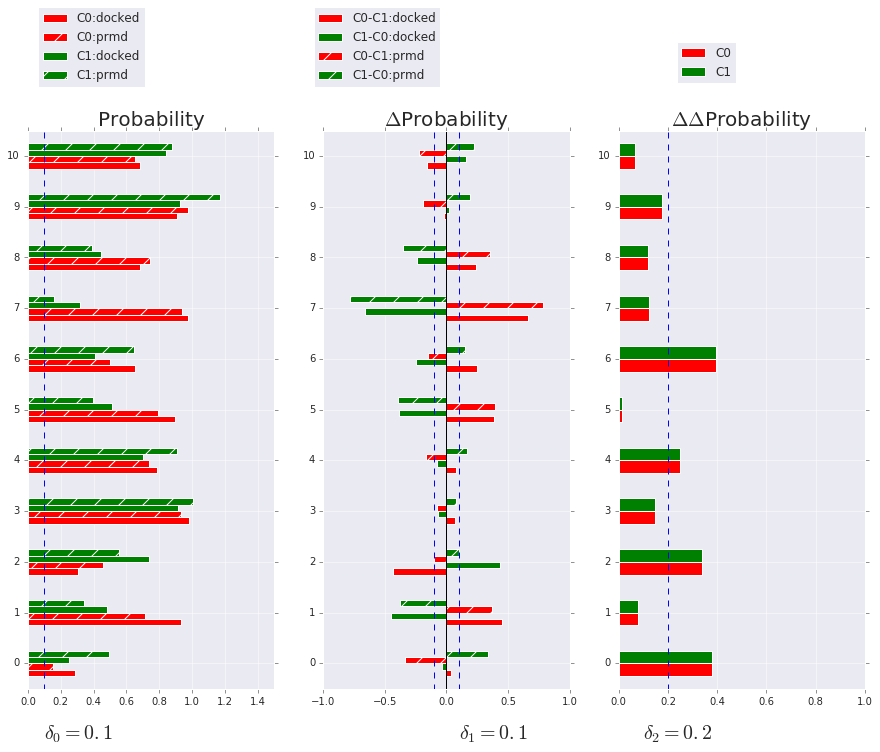

In [170]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
#########################################
# Probability values
df_P = pd.DataFrame(
    numpy.array([
        P['Conformation0']['docked'],
        P['Conformation0']['prmd'],
        P['Conformation1']['docked'],
        P['Conformation1']['prmd']]
    ).T
)

Labels_P = [
    'C0'+':'+'docked',
    'C0'+':'+'prmd',
    'C1'+':'+'docked',
    'C1'+':'+'prmd'
]

df_P.plot(
    kind='barh',
    ax=ax[0],
    color=['red', 'red', 'green', 'green']
)
ax[0].legend(Labels_P, loc='best', fontsize=15)

bars = ax[0].patches
hatches = ''.join(h*len(df_P) for h in ' / /')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax[0].legend(Labels_P, loc='center right', bbox_to_anchor=(0.5, 1.15), ncol=1)
ax[0].set_title("Probability", fontsize=20)
#
ax[0].plot((delta_0, delta_0), (-1, 11), linestyle='--', color='blue', alpha=1)
ax[0].text(0.1, -1.5, "$\delta_0="+str(delta_0)+"$", fontsize=20, rotation=0)
ax[0].set_xlim(0, 1.5)
#########################################
# Probability Difference values, docked models
df_dP = pd.DataFrame(
    numpy.array([
        dP['Conformation0']['docked'],
        dP['Conformation1']['docked'],
        dP['Conformation0']['prmd'],
        dP['Conformation1']['prmd'], ]
    ).T
)

Labels_dP = [
    'C0'+'-'+'C1:docked',
    'C1'+'-'+'C0:docked',
    'C0'+'-'+'C1:prmd',
    'C1'+'-'+'C0:prmd'
]

df_dP.plot(
    kind='barh',
    ax=ax[1],
    color=['red', 'green', 'red', 'green']
)

bars = ax[1].patches
hatches = ''.join(h*len(df_dP) for h in '  //')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax[1].legend(Labels_dP, loc='center right', bbox_to_anchor=(0.5, 1.15), ncol=1)
ax[1].set_title("$\Delta$Probability", fontsize=20)
#
ax[1].plot((delta_1, delta_1), (-1, 11), linestyle='--', color='blue', alpha=1)
ax[1].text(0.1, -1.5, "$\delta_1="+str(delta_1)+"$", fontsize=20, rotation=0)
ax[1].plot((0, 0), (-1, 11), color='black', alpha=1)
ax[1].plot((-delta_1, -delta_1), (-1, 11),
           linestyle='--', color='blue', alpha=1)
ax[1].set_xlim(-1, 1)
#########################################
# Probability Double-Difference values
df_ddP = pd.DataFrame(
    numpy.array([
        ddP['Conformation0'],
        ddP['Conformation1']]
    ).T
)

Labels_ddP = [
    'C0',
    'C1'
]

df_ddP.plot(
    kind='barh',
    ax=ax[2],
    color=['red', 'green']
)
ax[2].legend(Labels_ddP, loc='best', bbox_to_anchor=(0.5, 1.17), ncol=1)
ax[2].set_title("$\Delta\Delta$Probability", fontsize=20)
#
ax[2].plot((delta_2, delta_2), (-1, 11), linestyle='--', color='blue', alpha=1)
ax[2].text(0.1, -1.5, "$\delta_2="+str(delta_2)+"$", fontsize=20, rotation=0)
ax[2].plot((0, 0), (-1, 11), color='black', alpha=1)
ax[2].set_xlim(0, 1)


plt.show()

In [184]:
stages = ['docked', 'prmd']
conformations = ['Conformation0', 'Conformation1']
delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.2
N = 11  # Number of base interactions
stage0 = stages[0]
stage1 = stages[1]


def evaluate_interactions(C, stages=['docked', 'prmd']):
    X0 = P[C][stage0] > delta_0
    #
    X1_0 = dP[C][stage0] > delta_1
    X1_1 = dP[C][stage1] > delta_1
    #
    X1 = X1_0*X1_1
    X2 = ddP[C] < delta_2
    #
    Y = map(all, numpy.array([X0, X1, X2]).T)
    Z = [all(x) for x in numpy.array([X0, X1, X2]).T]
    return Z


Z = [evaluate_interactions(C) for C in conformations]

df_interaction_assessment = pd.DataFrame(
    {conformations[0]: Z[0][::-1], conformations[1]: Z[1][::-1]})

df_interaction_assessment.set_axis(
    ['s'+str(i) for i in range(N)][::-1], axis=0)

df_interaction_assessment

# Test with actual data 

In [14]:
import numpy
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import permutations

**Application to DataFrame**

In [15]:
workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/dfs/'
df_name = 'df_kihs_docked_to_urmd_0-10ns.json'
df_path = workdir+df_name

with open(df_path, 'r') as fp:
    df_test = pd.DataFrame(json.load(fp))

df_mutant = df_test[['0', '1', '7', '8']].fillna(0)

delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.2

In [19]:
conformations = ['Conformation0', 'Conformation1']
md_stages = ['docked', 'prmd']

P = {
    'Conformation0': {
        'docked': numpy.array(df_mutant['0']),
        'prmd': numpy.array(df_mutant['7'])
    },
    'Conformation1': {
        'docked': numpy.array(df_mutant['1']),
        'prmd': numpy.array(df_mutant['8'])
    }
}

dP = {}
for C_xy in list(permutations(conformations, 2)):
    C_x = C_xy[0]
    C_y = C_xy[1]
    dP[C_x] = {}
    for stage in md_stages:
        # Porbability difference, identical MD stage
        dP[C_x][stage] = P[C_x][stage] - P[C_y][stage]

ddP = {}
for C_x in conformations:
    ddP[C_x] = abs(dP[C_x][md_stages[-1]] - dP[C_x][md_stages[0]])

Visualize

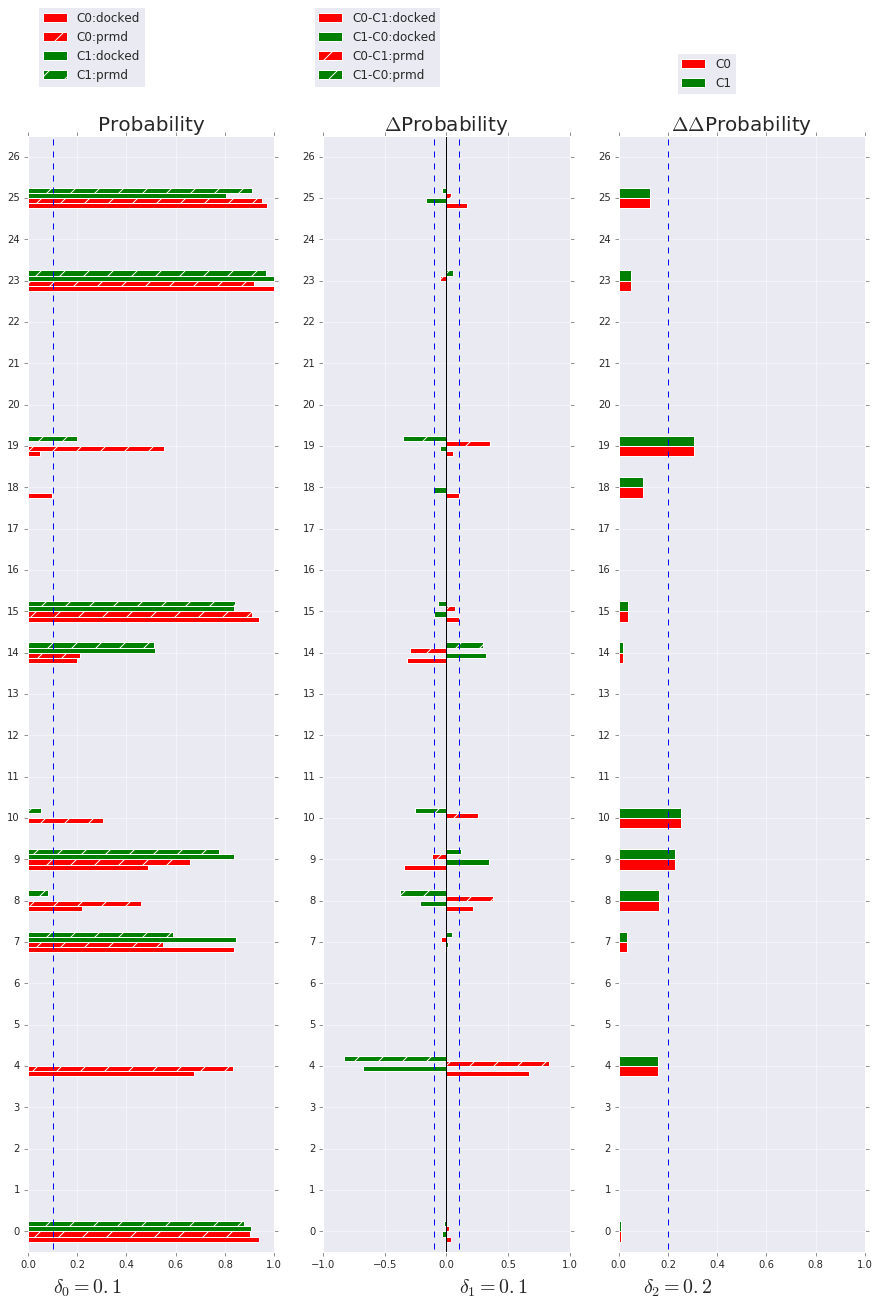

In [306]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 3, figsize=(15, 20))
#########################################
# Probability values
df_P = pd.DataFrame(
    numpy.array([
        P['Conformation0']['docked'],
        P['Conformation0']['prmd'],
        P['Conformation1']['docked'],
        P['Conformation1']['prmd']]
    ).T
)

Labels_P = [
    'C0'+':'+'docked',
    'C0'+':'+'prmd',
    'C1'+':'+'docked',
    'C1'+':'+'prmd'
]

df_P.plot(
    kind='barh',
    ax=ax[0],
    color=['red', 'red', 'green', 'green']
)
ax[0].legend(Labels_P, loc='best', fontsize=15)

bars = ax[0].patches
hatches = ''.join(h*len(df_P) for h in ' / /')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax[0].legend(Labels_P, loc='center right', bbox_to_anchor=(0.5, 1.08), ncol=1)
ax[0].set_title("Probability", fontsize=20)
#
ax[0].plot((delta_0, delta_0), (-1, 27), linestyle='--', color='blue', alpha=1)
ax[0].text(0.1, -1.5, "$\delta_0="+str(delta_0)+"$", fontsize=20, rotation=0)
ax[0].set_xlim(0, 1)
#########################################
# Probability Difference values, docked models
df_dP = pd.DataFrame(
    numpy.array([
        dP['Conformation0']['docked'],
        dP['Conformation1']['docked'],
        dP['Conformation0']['prmd'],
        dP['Conformation1']['prmd'], ]
    ).T
)

Labels_dP = [
    'C0'+'-'+'C1:docked',
    'C1'+'-'+'C0:docked',
    'C0'+'-'+'C1:prmd',
    'C1'+'-'+'C0:prmd'
]

df_dP.plot(
    kind='barh',
    ax=ax[1],
    color=['red', 'green', 'red', 'green']
)

bars = ax[1].patches
hatches = ''.join(h*len(df_dP) for h in '  //')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax[1].legend(Labels_dP, loc='center right', bbox_to_anchor=(0.5, 1.08), ncol=1)
ax[1].set_title("$\Delta$Probability", fontsize=20)
#
ax[1].plot((delta_1, delta_1), (-1, 27), linestyle='--', color='blue', alpha=1)
ax[1].text(0.1, -1.5, "$\delta_1="+str(delta_1)+"$", fontsize=20, rotation=0)
ax[1].plot((0, 0), (-1, 27), color='black', alpha=1)
ax[1].plot((-delta_1, -delta_1), (-1, 27),
           linestyle='--', color='blue', alpha=1)
ax[1].set_xlim(-1, 1)
#########################################
# Probability Double-Difference values
df_ddP = pd.DataFrame(
    numpy.array([
        ddP['Conformation0'],
        ddP['Conformation1']]
    ).T
)

Labels_ddP = [
    'C0',
    'C1'
]

df_ddP.plot(
    kind='barh',
    ax=ax[2],
    color=['red', 'green']
)
ax[2].legend(Labels_ddP, loc='best', bbox_to_anchor=(0.5, 1.08), ncol=1)
ax[2].set_title("$\Delta\Delta$Probability", fontsize=20)
#
ax[2].plot((delta_2, delta_2), (-1, 27), linestyle='--', color='blue', alpha=1)
ax[2].text(0.1, -1.5, "$\delta_2="+str(delta_2)+"$", fontsize=20, rotation=0)
ax[2].plot((0, 0), (-1, 27), color='black', alpha=1)
ax[2].set_xlim(0, 1)

plt.show()

Interaction assessment

In [318]:
delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.4

In [319]:
stages = ['docked', 'prmd']
conformations = ['Conformation0', 'Conformation1']
N = 11  # Number of base interactions
stage0 = stages[0]
stage1 = stages[1]


def evaluate_interactions(C, stages=['docked', 'prmd']):
    X0 = P[C][stage0] > delta_0
    #
    X1_0 = dP[C][stage0] > delta_1
    X1_1 = dP[C][stage1] > delta_1
    #
    X1 = X1_0*X1_1
    X2 = ddP[C] < delta_2
    #
    Y = map(all, numpy.array([X0, X1, X2]).T)
    Z = [all(x) for x in numpy.array([X0, X1, X2]).T]
    return Z


Z = [evaluate_interactions(C) for C in conformations]

df_interaction_assessment = pd.DataFrame(
    {conformations[0]: Z[0][::-1], conformations[1]: Z[1][::-1]})

df_interaction_assessment.set_axis(
    ['s'+str(i) for i in range(27)][::-1], axis=0)

/home/ba13026/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:24: FutureWarning: set_axis currently defaults to operating inplace.
This will change in a future version of pandas, use inplace=True to avoid this warning.


In [320]:
df_interaction_assessment

,Conformation0,Conformation1
s26,False,False
s25,False,False
s24,False,False
s23,False,False
s22,False,False
s21,False,False
s20,False,False
s19,False,False
s18,False,False
s17,False,False


# SCRIPT

VERSION 0.1.0

In [48]:
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import numpy
% % writefile / home/ba13026/mpmodeling/analysis/interaction_assessment.py
#########################################################
#
#########################################################


def evaluate_interactions(C, md_stages, P, dP, ddP, delta_0, delta_1, delta_2):
    # Check Probability ABOVE threshold_0, for primary conformation C
    X0 = P[C][md_stages[0]] > delta_0
    # Check Probability difference between conformations, C as primary, ABOVE threshold_1
    # per MD stage
    X1_0 = dP[C][md_stages[0]] > delta_1
    X1_1 = dP[C][md_stages[1]] > delta_1
    X1 = X1_0*X1_1
    # Check Double Probability difference BELOW threshold_2
    X2 = ddP[C] < delta_2

    # Check all criteria are fullfilled per interaction, for conformation C
    Y = map(all, numpy.array([X0, X1, X2]).T)
    Z = [all(x) for x in numpy.array([X0, X1, X2]).T]
    # Return assessment per interaction, for conformation C
    return Z


#########################################################
# LOAD DataFrame
#########################################################
workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/dfs/'
df_name = 'df_hbonds_docked_to_urmd_0-10ns.json'
df_path = workdir+df_name

with open(df_path, 'r') as fp:
    df_test = pd.DataFrame(json.load(fp))
# Extract interaction data for mutant conformations
dc = 0
# Docked and PRMD data, per conformations
df_columns = [str(0+dc), str(7+dc), str(1+dc), str(8+dc)]
df_mutant = df_test[df_columns].fillna(0)  # Replace NaN entries with zeros
#########################################################
# INTERACTION ASSESSMENT
#########################################################
# Threshold values
delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.4

# Conformations and MD stages to compare
conformations = ['Conformation0', 'Conformation1']
md_stages = ['docked', 'prmd']

# Define Probability differences
P = {
    'Conformation0': {
        'docked': numpy.array(df_mutant[df_columns[0]]),
        'prmd': numpy.array(df_mutant[df_columns[1]])
    },
    'Conformation1': {
        'docked': numpy.array(df_mutant[df_columns[2]]),
        'prmd': numpy.array(df_mutant[df_columns[3]])
    }
}

dP = {}
for C_xy in list(permutations(conformations, 2)):
    C_x = C_xy[0]
    C_y = C_xy[1]
    dP[C_x] = {}
    for stage in md_stages:
        # Porbability difference, identical MD stage
        dP[C_x][stage] = P[C_x][stage] - P[C_y][stage]

ddP = {}
for C_x in conformations:
    # Fluctuations in Probability differences between stages
    ddP[C_x] = abs(dP[C_x][md_stages[-1]] - dP[C_x][md_stages[0]])
#########################################################
Z = []
for C in conformations:
    output = evaluate_interactions(
        C, md_stages, P, dP, ddP, delta_0, delta_1, delta_2)
    Z.append(list(map(int, output)))

print(Z)

Overwriting /home/ba13026/mpmodeling/analysis/interaction_assessment.py


In [1]:
%run / home/ba13026/mpmodeling/analysis/interaction_assessment.py

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]


NEW TEST

In [3]:
workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/'

with open(workdir+"superbase_hbonds_docked2urmd.json", 'r') as fp:
    sbase0 = json.load(fp)

with open(workdir+"df_hbonds_docked2prmd.json", 'r') as fp:
    df_hbonds = pd.DataFrame(json.load(fp))

fig, ax = plt.subplots(2, 2, figsize=(14, 18), sharex=True, sharey=True)
/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax
df_hbonds[['0', '1']].plot(kind='barh', ax=ax[0, 0])
df_hbonds[['2', '3']].plot(kind='barh', ax=ax[0, 1])
df_hbonds[['4', '5']].plot(kind='barh', ax=ax[1, 0])
df_hbonds[['6']].plot(kind='barh', ax=ax[1, 1])

ax[0, 0].set_xlim(0, 1)

plt.show()

VERSION 0.2.0

In [1]:
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import numpy
import sys
% % writefile / home/ba13026/mpmodeling/analysis/interaction_assessment-0.2.0.py
__version__ = '0.2.0'
__author__ = 'Broncio Aguilar Sanjuan'
#########################################################
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

CONFORMATIONS = {
    'cWza': ['Conformation0', 'Conformation1'],
    'cWza-K375C': ['Conformation0', 'Conformation1'],
    'cWza-S355C': ['Conformation0', 'Conformation1'],
    'cWza-Y373C': ['Conformation1']
}
#########################################################
df_name = sys.argv[1]  # Name of Pandas DF
#########################################################


def evaluate_interactions(C, md_stages, P, dP, ddP, delta_0, delta_1, delta_2):
    # Check Probability ABOVE threshold_0, for primary conformation C
    X0 = P[C][md_stages[0]] > delta_0
    # Check Probability difference between conformations, C as primary, ABOVE threshold_1
    # per MD stage
    X1_0 = dP[C][md_stages[0]] > delta_1
    X1_1 = dP[C][md_stages[1]] > delta_1
    X1 = X1_0*X1_1
    # Check Double Probability difference BELOW threshold_2
    X2 = ddP[C] < delta_2

    # Check all criteria are fullfilled per interaction, for conformation C
    Y = map(all, numpy.array([X0, X1, X2]).T)
    Z = [all(x) for x in numpy.array([X0, X1, X2]).T]
    # Return assessment per interaction, for conformation C
    return Z


#########################################################
# LOAD DataFrame
#########################################################
workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/dfs/'
df_path = workdir+df_name

with open(df_path, 'r') as fp:
    df_test = pd.DataFrame(json.load(fp))
#########################################################
# INTERACTION ASSESSMENT
#########################################################
# Threshold values
delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.4
dc = 0
for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    conformations = CONFORMATIONS[mutant]
    if mutant != 'cWza-Y373C':
        # Extract interaction data for mutant conformations
        # Docked and PRMD data, per conformations
        df_columns = [str(0+dc), str(7+dc), str(1+dc), str(8+dc)]
        df_mutant = df_test[df_columns].fillna(
            0)  # Replace NaN entries with zeros
        # Conformations and MD stages to compare
        conformations = ['Conformation0', 'Conformation1']
        md_stages = ['docked', 'prmd']

        # Define Probability differences
        P = {
            'Conformation0': {
                'docked': numpy.array(df_mutant[df_columns[0]]),
                'prmd': numpy.array(df_mutant[df_columns[1]])
            },
            'Conformation1': {
                'docked': numpy.array(df_mutant[df_columns[2]]),
                'prmd': numpy.array(df_mutant[df_columns[3]])
            }
        }

        dP = {}
        for C_xy in list(permutations(conformations, 2)):
            C_x = C_xy[0]
            C_y = C_xy[1]
            dP[C_x] = {}
            for stage in md_stages:
                # Porbability difference, identical MD stage
                dP[C_x][stage] = P[C_x][stage] - P[C_y][stage]

        ddP = {}
        for C_x in conformations:
            # Fluctuations in Probability differences between stages
            ddP[C_x] = abs(dP[C_x][md_stages[-1]] - dP[C_x][md_stages[0]])
        #########################################################
        Z = []
        for C in conformations:
            output = evaluate_interactions(
                C, md_stages, P, dP, ddP, delta_0, delta_1, delta_2)
            Z.append(list(map(int, output)))

        print(Z)
        dc += 2

Overwriting /home/ba13026/mpmodeling/analysis/interaction_assessment-0.2.0.py


VERSION 0.0.3

In [306]:
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import numpy
import sys
% % writefile / home/ba13026/mpmodeling/analysis/interaction_assessment-0.4.0.py


def is_significant(X, delta):
    X = numpy.array(X)
    assessment = X > delta
    return assessment


def is_relevant_to_conformation(X_a, X_b, delta):
    """Assess relevance of interactions relative to a conformation in contrast to another above some threshold"""
    X_a = numpy.array(X_a)
    X_b = numpy.array(X_b)
    try:
        dX = X_a - X_b
        assessment = dX > delta
        return assessment
    except:
        print("Check input vectors")


def is_robust_after_md(X_init, X_final, delta_2):
    """Assess probability change between different simulation stages up to some threshold"""
    X_init = numpy.array(X_init)
    X_final = numpy.array(X_final)

    dX = X_final - X_init
    bol_assessment = abs(dX) < delta_2

    return bol_assessment


def is_relevant_and_robust(P, conformations, md_stages, Deltas):
    """Assess whethere relevance of iteractions per conformations is robust under MD stages"""
    delta_0 = Deltas[0]
    delta_1 = Deltas[1]
    delta_2 = Deltas[2]
    stage_init = md_stages[0]
    stage_final = md_stages[-1]
    Z = []
    for C_ab in list(permutations(conformations, 2)):
        C_a = C_ab[0]
        C_b = C_ab[1]
        X_a_init = P[C_a][stage_init]
        X_a_final = P[C_a][stage_final]
        X_b_init = P[C_b][stage_init]
        X_b_final = P[C_b][stage_final]
        ############################################
        test0_a_init = is_significant(X_a_init, delta_0)

        test1_a_init = is_relevant_to_conformation(X_a_init, X_b_init, delta_1)
        test1_a_final = is_relevant_to_conformation(
            X_a_final, X_b_final, delta_1)

        test2_a = is_robust_after_md(
            X_a_final - X_a_init, X_b_final - X_b_init, delta_2)
        ############################################
        overall = numpy.array([
            test0_a_init,
            test1_a_init*test1_a_final,
            test2_a
        ]).T

        bol_assessment = [all(x) for x in overall]
        Z.append(list(map(int, bol_assessment)))
    return Z


########################################################
if __name__ == "__main__":
    df_name = sys.argv[1]  # JSON DF input
    outfile = sys.argv[2]  # JSON output
    #########################################################
    # LOAD DataFrame
    #########################################################
    workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/'
    df_path = workdir+df_name

    with open(df_path, 'r') as fp:
        df_test = pd.DataFrame(json.load(fp))
    #########################################################
    # INTERACTION ASSESSMENT
    #########################################################
    # Set up values
    md_stages = ['docked', 'prmd']
    mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

    CONFORMATIONS = {
        'cWza': ['Conformation0', 'Conformation1'],
        'cWza-K375C': ['Conformation0', 'Conformation1'],
        'cWza-S355C': ['Conformation0', 'Conformation1'],
        'cWza-Y373C': ['Conformation1']
    }

    # Threshold values
    Deltas = [0.1, 0.1, 0.4]
    dc = 0
    ASSESSMENT = {}
    for i in range(len(mutant_names)):
        mutant = mutant_names[i]
        conformations = CONFORMATIONS[mutant]
        if mutant != 'cWza-Y373C':
            #########################################################
            # Extract interaction data for mutant conformations and MD stages
            #########################################################
            if mutant != 'cWza-K375C':
                # Docked and PRMD data, per conformations
                df_columns = [str(0+dc), str(7+dc), str(1+dc), str(8+dc)]
            else:
                # Docked and PRMD data, per conformations
                df_columns = [str(0+dc), str(8+dc), str(1+dc), str(7+dc)]
            df_mutant = df_test[df_columns].fillna(
                0)  # Replace NaN entries with zeros
            # Conformations and MD stages to compare
            P = {
                'Conformation0': {
                    'docked': numpy.array(df_mutant[df_columns[0]]),
                    'prmd': numpy.array(df_mutant[df_columns[1]])
                },
                'Conformation1': {
                    'docked': numpy.array(df_mutant[df_columns[2]]),
                    'prmd': numpy.array(df_mutant[df_columns[3]])
                }
            }
            #########################################################
            # Interaction assessment
            #########################################################
            assessment = is_relevant_and_robust(
                P, conformations, md_stages, Deltas)
            ASSESSMENT[mutant] = assessment

        else:
            #########################################################
            # Extract interaction data for mutant single conformation and MD stages
            #########################################################
            # Docked and PRMD data, per conformations
            df_columns = [str(0+dc), str(7+dc)]
            df_mutant = df_test[df_columns].fillna(
                0)  # Replace NaN entries with zeros
            # Conformations and MD stages to compare
            P = {
                'Conformation1': {
                    'docked': numpy.array(df_mutant[df_columns[0]]),
                    'prmd': numpy.array(df_mutant[df_columns[1]])
                }
            }
            #########################################################
            # Interaction assessment
            #########################################################
            delta_0 = Deltas[0]
            delta_2 = Deltas[2]
            C = 'Conformation1'
            X_init = P[C]['docked']
            X_final = P[C]['prmd']
            test_0 = is_significant(X_init, delta_0)
            test_1 = is_robust_after_md(X_init, X_final, delta_2)
            overall = numpy.array([
                test_0,
                test_1
            ]).T
            assessment = list(map(int, [all(x) for x in overall]))
            #########################################################
            ASSESSMENT[mutant] = assessment
        dc += 2
    #########################################################
    # Save data in DF as JSON file
    #########################################################
    # DF Columns
    Columns = [
        'cWza:C0',
        'cWza:C1',
        'cWza-K375C:C0',
        'cWza-K375C:C1',
        'cWza-S355C:C0',
        'cWza-S355C:C1',
        'cWza-Y373C:C'
    ]
    # Get data for heatmap
    inter_dict = ASSESSMENT
    Data = numpy.array([
        inter_dict['cWza'][0],
        inter_dict['cWza'][1],
        inter_dict['cWza-K375C'][0],
        inter_dict['cWza-K375C'][1],
        inter_dict['cWza-S355C'][0],
        inter_dict['cWza-S355C'][1],
        inter_dict['cWza-Y373C']
    ]).T
    # Define DF and filter out
    df_out = pd.DataFrame(Data, columns=Columns)
    df_out.set_axis(list(df_test.index), axis=0)
    df_out.to_json(outfile)

Overwriting /home/ba13026/mpmodeling/analysis/interaction_assessment-0.3.0.py


In [308]:
from itertools import permutations
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import numpy
import sys
% % writefile / home/ba13026/mpmodeling/analysis/interaction_assessment-0.4.0.py


def is_significant(X, delta):
    X = numpy.array(X)
    assessment = X > delta
    return assessment


def is_relevant_to_conformation(X_a, X_b, delta):
    """Assess relevance of interactions relative to a conformation in contrast to another above some threshold"""
    X_a = numpy.array(X_a)
    X_b = numpy.array(X_b)
    try:
        dX = X_a - X_b
        assessment = dX > delta
        return assessment
    except:
        print("Check input vectors")


def is_robust_after_md(X_init, X_final, delta_2):
    """Assess probability change between different simulation stages up to some threshold"""
    X_init = numpy.array(X_init)
    X_final = numpy.array(X_final)

    dX = X_final - X_init
    bol_assessment = abs(dX) < delta_2

    return bol_assessment


def is_relevant_and_robust(P, conformations, md_stages, Deltas):
    """Assess whethere relevance of iteractions per conformations is robust under MD stages"""
    delta_0 = Deltas[0]
    delta_1 = Deltas[1]
    delta_2 = Deltas[2]
    stage_init = md_stages[0]
    stage_final = md_stages[-1]
    Z = []
    for C_ab in list(permutations(conformations, 2)):
        C_a = C_ab[0]
        C_b = C_ab[1]
        X_a_init = P[C_a][stage_init]
        X_a_final = P[C_a][stage_final]
        X_b_init = P[C_b][stage_init]
        X_b_final = P[C_b][stage_final]
        ############################################
        test0_a_init = is_significant(X_a_init, delta_0)

        test1_a_init = is_relevant_to_conformation(X_a_init, X_b_init, delta_1)
        test1_a_final = is_relevant_to_conformation(
            X_a_final, X_b_final, delta_1)

        test2_a = is_robust_after_md(
            X_a_final - X_a_init, X_b_final - X_b_init, delta_2)
        ############################################
        overall = numpy.array([
            test0_a_init,
            test1_a_init*test1_a_final,
            test2_a
        ]).T

        bol_assessment = [all(x) for x in overall]
        Z.append(list(map(int, bol_assessment)))
    return Z


########################################################
if __name__ == "__main__":
    df_name = sys.argv[1]  # JSON DF input
    outfile = sys.argv[2]  # JSON output
    #########################################################
    # LOAD DataFrame
    #########################################################
    workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/'
    df_path = workdir+df_name

    with open(df_path, 'r') as fp:
        df_test = pd.DataFrame(json.load(fp))
    #########################################################
    # INTERACTION ASSESSMENT
    #########################################################
    # Set up values
    md_stages = ['docked', 'prmd']
    mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']

    CONFORMATIONS = {
        'cWza': ['Conformation0', 'Conformation1'],
        'cWza-K375C': ['Conformation0', 'Conformation1'],
        'cWza-S355C': ['Conformation0', 'Conformation1'],
        'cWza-Y373C': ['Conformation1']
    }

    # Threshold values
    Deltas = [0.1, 0.1, 0.4]
    dc = 0
    ASSESSMENT = {}
    for i in range(len(mutant_names)):
        mutant = mutant_names[i]
        conformations = CONFORMATIONS[mutant]
        if mutant != 'cWza-Y373C':
            #########################################################
            # Extract interaction data for mutant conformations and MD stages
            #########################################################
            if mutant != 'cWza-K375C':
                # Docked and PRMD data, per conformations
                df_columns = [str(0+dc), str(14+dc), str(1+dc), str(15+dc)]
            else:
                # Docked and PRMD data, per conformations
                df_columns = [str(0+dc), str(15+dc), str(1+dc), str(14+dc)]
            df_mutant = df_test[df_columns].fillna(
                0)  # Replace NaN entries with zeros
            # Conformations and MD stages to compare
            P = {
                'Conformation0': {
                    'docked': numpy.array(df_mutant[df_columns[0]]),
                    'prmd': numpy.array(df_mutant[df_columns[1]])
                },
                'Conformation1': {
                    'docked': numpy.array(df_mutant[df_columns[2]]),
                    'prmd': numpy.array(df_mutant[df_columns[3]])
                }
            }
            #########################################################
            # Interaction assessment
            #########################################################
            assessment = is_relevant_and_robust(
                P, conformations, md_stages, Deltas)
            ASSESSMENT[mutant] = assessment

        else:
            #########################################################
            # Extract interaction data for mutant single conformation and MD stages
            #########################################################
            # Docked and PRMD data, per conformations
            df_columns = [str(0+dc), str(14+dc)]
            df_mutant = df_test[df_columns].fillna(
                0)  # Replace NaN entries with zeros
            # Conformations and MD stages to compare
            P = {
                'Conformation1': {
                    'docked': numpy.array(df_mutant[df_columns[0]]),
                    'prmd': numpy.array(df_mutant[df_columns[1]])
                }
            }
            #########################################################
            # Interaction assessment
            #########################################################
            delta_0 = Deltas[0]
            delta_2 = Deltas[2]
            C = 'Conformation1'
            X_init = P[C]['docked']
            X_final = P[C]['prmd']
            test_0 = is_significant(X_init, delta_0)
            test_1 = is_robust_after_md(X_init, X_final, delta_2)
            overall = numpy.array([
                test_0,
                test_1
            ]).T
            assessment = list(map(int, [all(x) for x in overall]))
            #########################################################
            ASSESSMENT[mutant] = assessment
        dc += 2
    #########################################################
    # Save data in DF as JSON file
    #########################################################
    # DF Columns
    Columns = [
        'cWza:C0',
        'cWza:C1',
        'cWza-K375C:C0',
        'cWza-K375C:C1',
        'cWza-S355C:C0',
        'cWza-S355C:C1',
        'cWza-Y373C:C'
    ]
    # Get data for heatmap
    inter_dict = ASSESSMENT
    Data = numpy.array([
        inter_dict['cWza'][0],
        inter_dict['cWza'][1],
        inter_dict['cWza-K375C'][0],
        inter_dict['cWza-K375C'][1],
        inter_dict['cWza-S355C'][0],
        inter_dict['cWza-S355C'][1],
        inter_dict['cWza-Y373C']
    ]).T
    # Define DF and filter out
    df_out = pd.DataFrame(Data, columns=Columns)
    df_out.set_axis(list(df_test.index), axis=0)
    df_out.to_json(outfile)

Overwriting /home/ba13026/mpmodeling/analysis/interaction_assessment-0.4.0.py


**VISUALIZE**

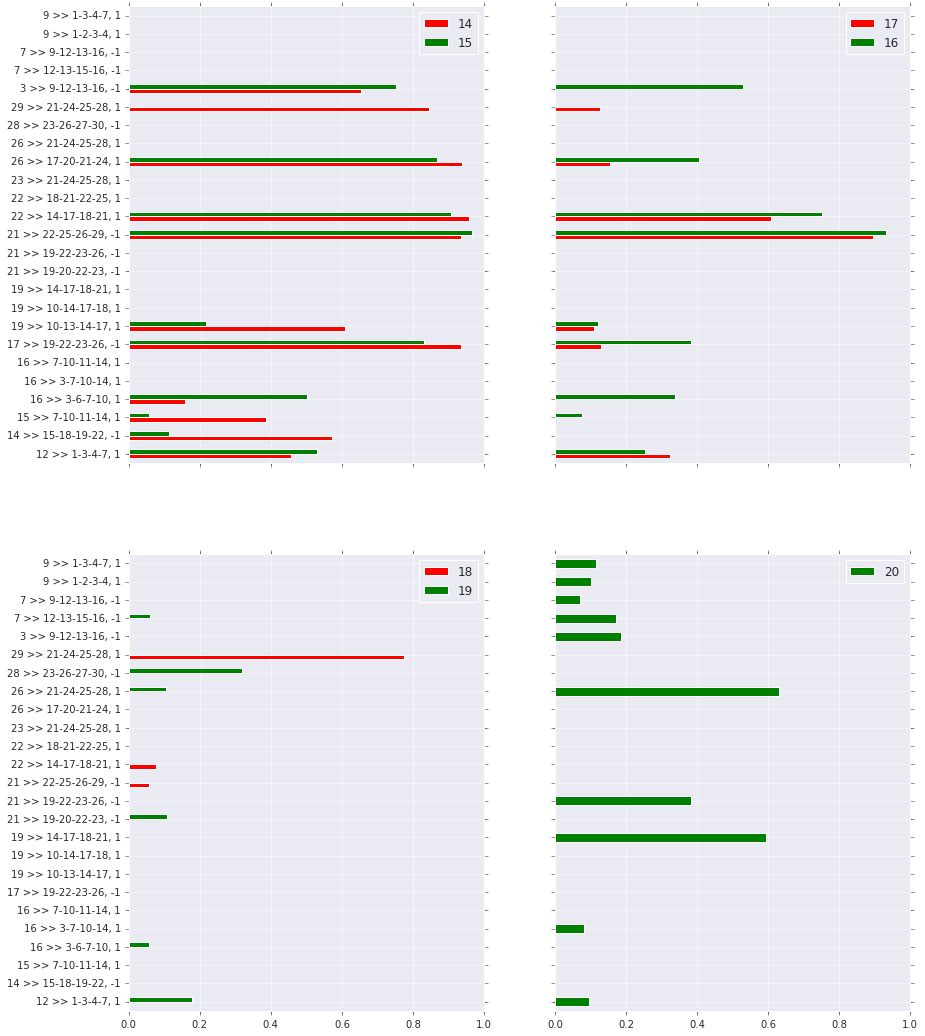

In [305]:
workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/'

with open(workdir+"superbase_kihs_docked2urmd.json", 'r') as fp:
    sbase0 = json.load(fp)

with open(workdir+"df_kihs_docked2prmd.json", 'r') as fp:
    df_hbonds = pd.DataFrame(json.load(fp))

fig, ax = plt.subplots(2, 2, figsize=(14, 18), sharex=True, sharey=True)

dc = 14
df_hbonds[[str(0+dc), str(1+dc)]].plot(kind='barh',
                                       color=['red', 'green'], ax=ax[0, 0])
df_hbonds[[str(3+dc), str(2+dc)]].plot(kind='barh',
                                       color=['red', 'green'], ax=ax[0, 1])
df_hbonds[[str(4+dc), str(5+dc)]].plot(kind='barh',
                                       color=['red', 'green'], ax=ax[1, 0])
df_hbonds[[str(6+dc)]].plot(kind='barh', color=['green'], ax=ax[1, 1])

ax[0, 0].set_xlim(0, 1)

plt.show()

# Interaction Assessment Data

## Visualization

Essential libraries

<IPython.core.display.Javascript object>


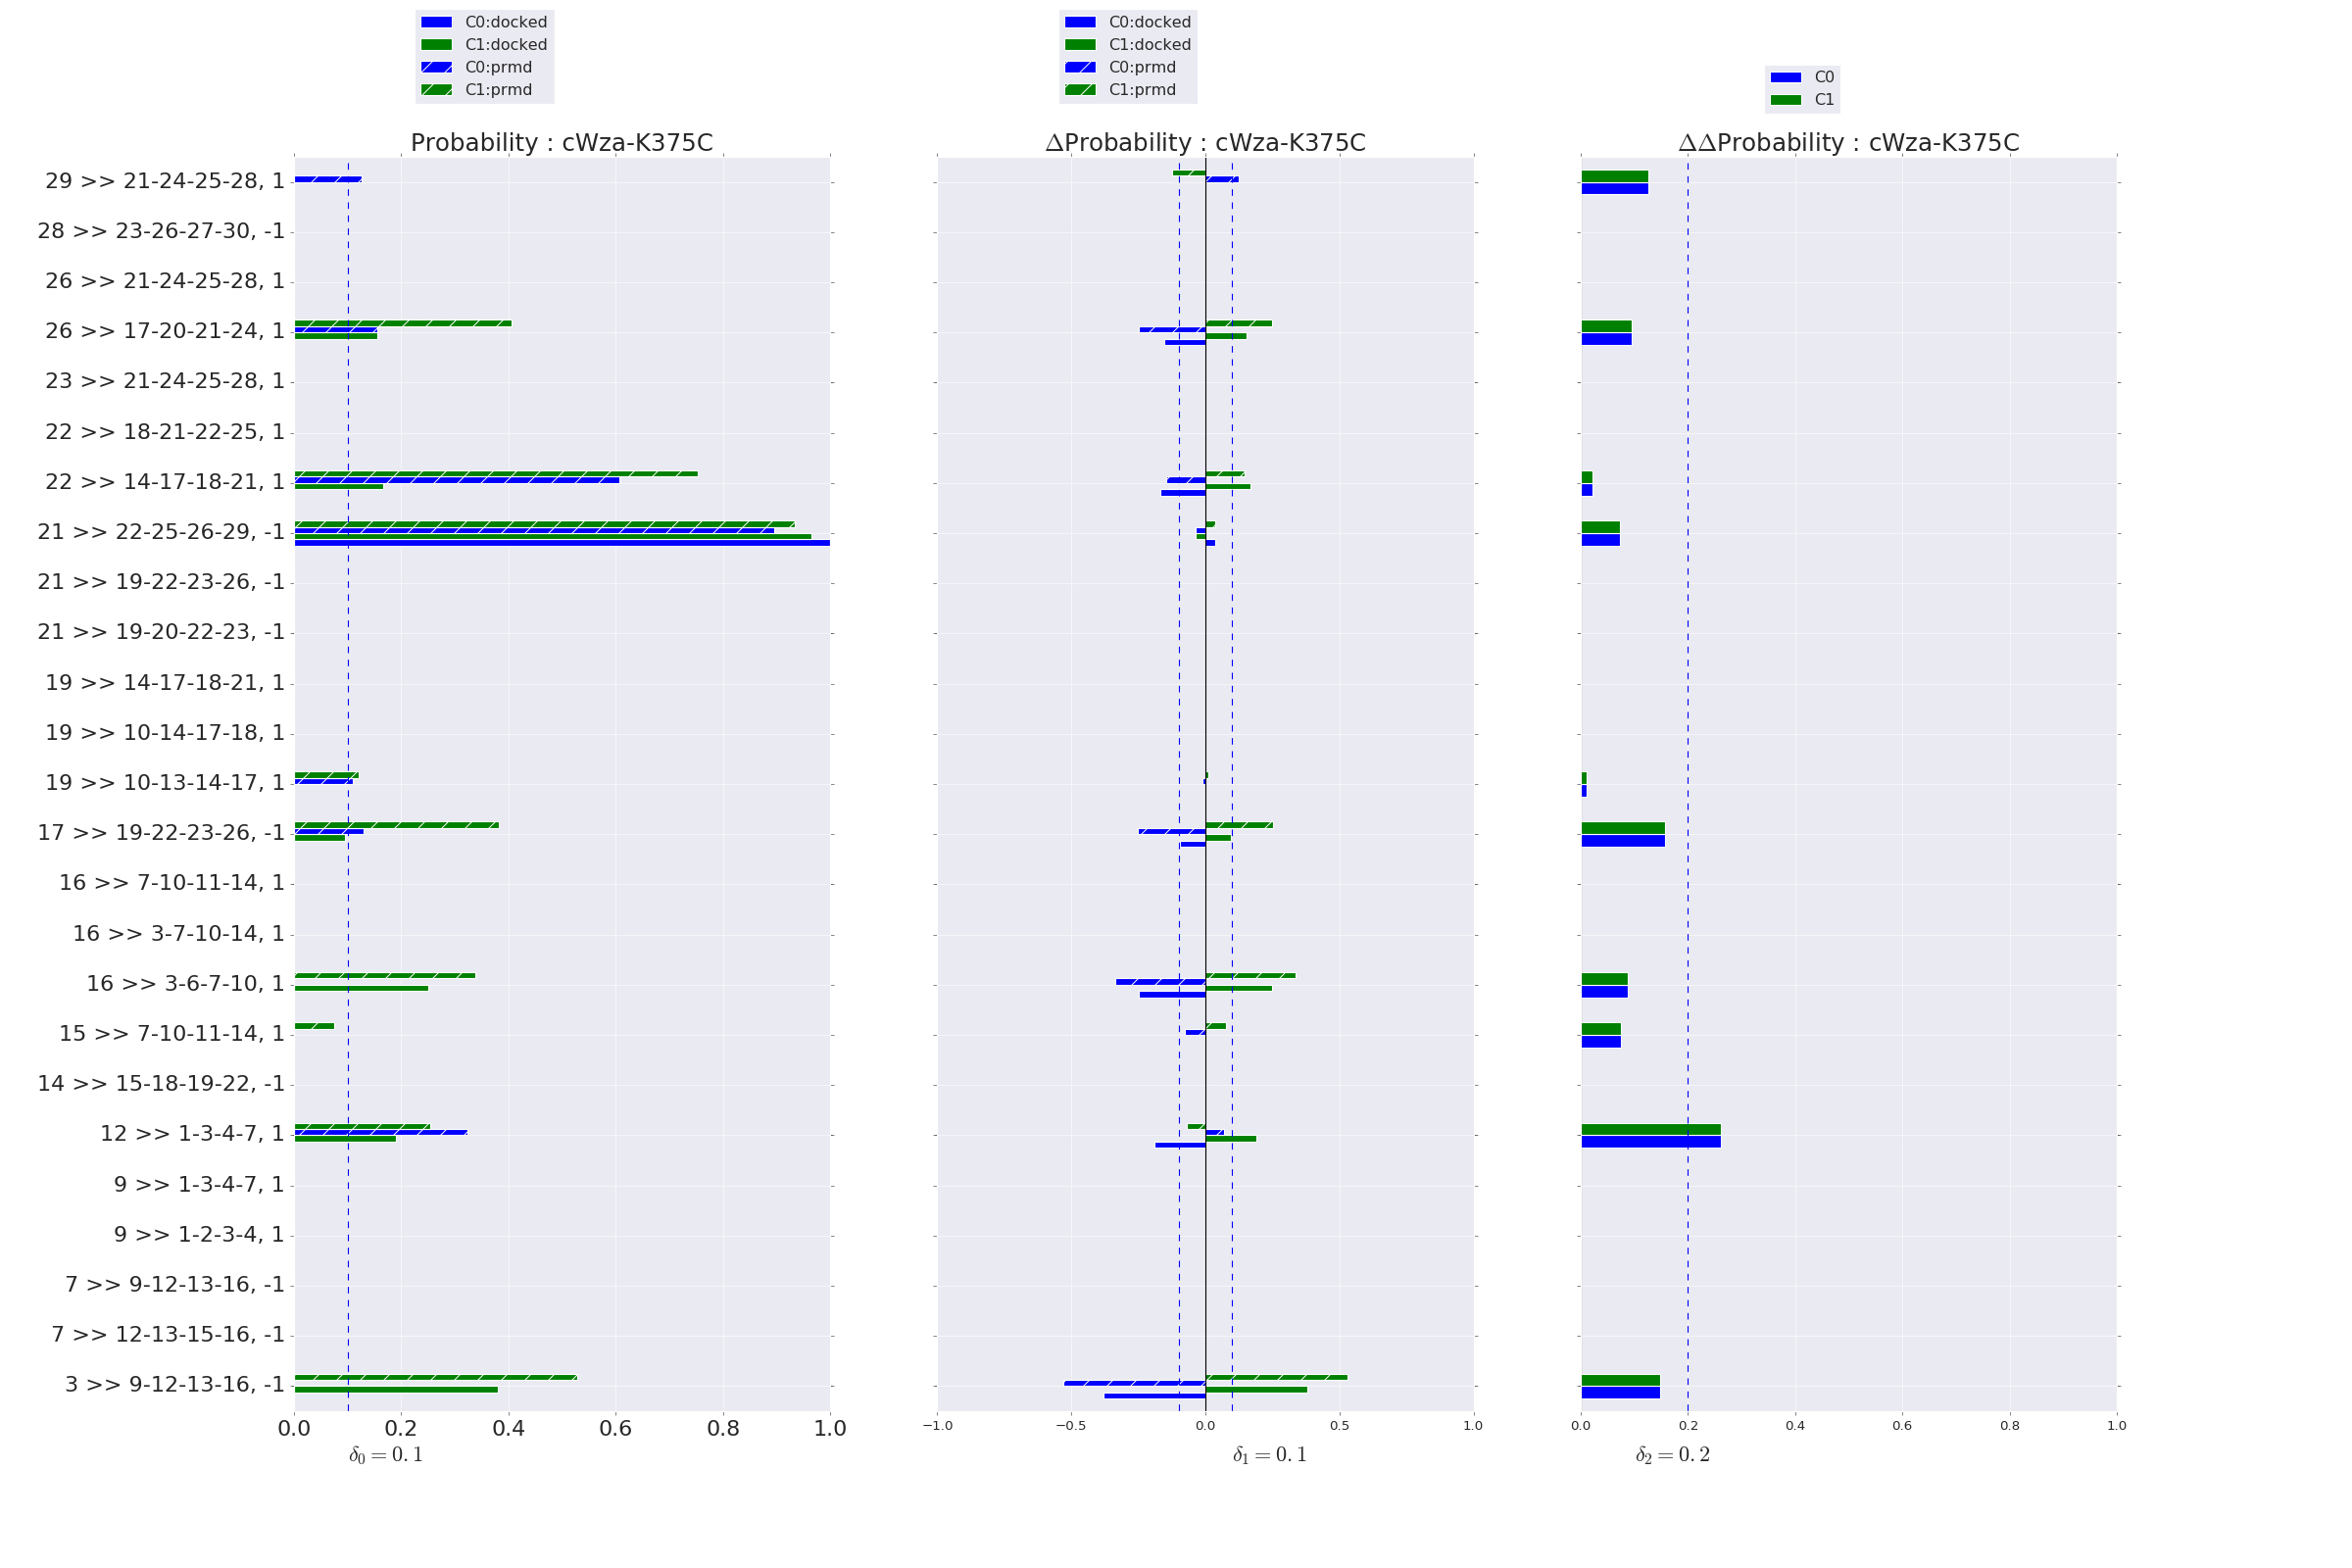

In [84]:
import json
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter
from itertools import permutations
sns.set_style("darkgrid")
%matplotlib notebook
#########################################################
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']
#########################################################

# Dataframe definition

inter = 'kihs'

df_name = 'df_'+inter+'_docked2prmd.json'

workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/dfs/'
df_path = workdir+df_name

with open(df_path, 'r') as fp:
    df_all = pd.DataFrame(json.load(fp))

df_all = df_all.fillna(0)

sbase_refined = list(list(df_all.index))

if inter == 'hbonds':
    rank = [(int(sbase_refined[i].split('-')[0]), i)
            for i in range(len(sbase_refined))]
elif inter == 'kihs':
    rank = [(int(sbase_refined[i].split('>>')[0]), i)
            for i in range(len(sbase_refined))]

sorted_sbase = itemgetter(
    *[x[1] for x in sorted(rank, key=itemgetter(0))])(sbase_refined)

df_all = df_all.reindex(list(sorted_sbase))

df_mutant = {}
COUNTER = 0

stage_init = 'docked'
stage_last = 'prmd'

for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    if mutant != 'cWza-Y373C':
        columns = [0+COUNTER, 14+COUNTER, 1+COUNTER, 15+COUNTER]
        columns_renamed = ['C0:'+stage_init, 'C0:' +
                           stage_last, 'C1:'+stage_init, 'C1:'+stage_last]
    else:
        columns = [0+COUNTER, 14+COUNTER]
        columns_renamed = ['C1:'+stage_init, 'C1:'+stage_last]
    df_mutant[mutant] = df_all[list(map(str, columns))]
    df_mutant[mutant].columns = columns_renamed
    COUNTER += 2

# Fix mislabelling for cWza-K375C mutant

columns_switched = ['C0:docked', 'C1:' +
                    stage_last, 'C1:docked', 'C0:'+stage_last]
df_mutant['cWza-K375C'].columns = columns_switched

# Probability Metrics

mutant = 'cWza-K375C'
delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.2  # threshold values

if mutant != 'cWza-Y373C':
    conformations = ['C0', 'C1']
elif mutant == 'cWza-Y373C':
    conformations = ['C1']

md_stages = ['docked', 'prmd']

df_P = {}
df_P[mutant] = df_mutant[mutant]

if mutant != 'cWza-Y373C':
    df_dP = {}
    df_dP[mutant] = pd.DataFrame()

    for C_xy in list(permutations(conformations, 2)):
        C_x = C_xy[0]
        C_y = C_xy[1]
        for stage in md_stages:
            # Porbability difference, identical MD stage
            df_dP[mutant][C_x+':'+stage] = df_P[mutant][C_x +
                                                        ':'+stage] - df_P[mutant][C_y+':'+stage]

    df_ddP = {}
    df_ddP[mutant] = pd.DataFrame()

    for C_x in conformations:
        df_ddP[mutant][C_x] = abs(
            df_dP[mutant][C_x+':'+md_stages[-1]] - df_dP[mutant][C_x+':'+md_stages[0]])
elif mutant == 'cWza-Y373C':
    df_dP = {}
    df_dP[mutant] = pd.DataFrame()

    # Porbability difference, identical MD stage
    C_x = conformations[0]
    df_dP[mutant][C_x] = df_P[mutant][C_x+':'+md_stages[-1]] - \
        df_P[mutant][C_x+':'+md_stages[0]]

if mutant != 'cWza-Y373C':
    columns_stage_init = ['C0:'+stage_init, 'C1:'+stage_init]
    columns_stage_last = ['C0:'+stage_last, 'C1:'+stage_last]
    columns_stage_all = columns_stage_init + columns_stage_last
else:
    columns_stage_all = ['C1:'+stage_init, 'C1:'+stage_init]

fig, ax = plt.subplots(1, len(conformations)+1,
                       figsize=(15*len(conformations), 20), sharey=True)
#########################################
# Probability values
#########################################
if mutant != 'cWza-Y373C':
    df_P[mutant][columns_stage_all].plot(
        kind='barh',
        ax=ax[0],
        color=2*['blue', 'green']
    )
    hatches = '  //'
else:
    df_P[mutant][columns_stage_all].plot(
        kind='barh',
        ax=ax[0],
        color=['green', 'green']
    )
    hatches = ' /'

bars = ax[0].patches
hatches = ''.join(h*len(df_P[mutant]) for h in hatches)

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax[0].legend(loc='center right', bbox_to_anchor=(0.5, 1.08), ncol=1)
ax[0].set_title("Probability : "+mutant, fontsize=22)
#
ax[0].plot((delta_0, delta_0), (-1, len(df_P[mutant])),
           linestyle='--', color='blue', alpha=1)
ax[0].text(0.1, -1.5, "$\delta_0="+str(delta_0)+"$", fontsize=20, rotation=0)
ax[0].set_xlim(0, 1)

ax[0].tick_params(axis='y', which='major', labelsize=20)
ax[0].tick_params(axis='x', which='major', labelsize=20)

#########################################
# Probability Difference values, docked models
#########################################

if mutant != 'cWza-Y373C':
    df_dP[mutant][columns_stage_all].plot(
        kind='barh',
        ax=ax[1],
        color=2*['blue', 'green']
    )
else:
    df_dP[mutant].plot(
        kind='barh',
        ax=ax[1],
        color=['green', 'green']
    )

bars = ax[1].patches
hatches = ''.join(h*len(df_dP[mutant]) for h in '  //')

for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)

ax[1].legend(loc='center right', bbox_to_anchor=(0.5, 1.08), ncol=1)
ax[1].set_title("$\Delta$Probability : "+mutant, fontsize=22)
#
ax[1].plot((delta_1, delta_1), (-1, len(df_P[mutant])),
           linestyle='--', color='blue', alpha=1)
ax[1].text(0.1, -1.5, "$\delta_1="+str(delta_1)+"$", fontsize=20, rotation=0)
ax[1].plot((0, 0), (-1, len(df_P[mutant])), color='black', alpha=1)
ax[1].plot((-delta_1, -delta_1), (-1, len(df_P[mutant])),
           linestyle='--', color='blue', alpha=1)
ax[1].set_ylabel('')
ax[1].set_xlim(-1, 1)
#########################################
# Probability Double-Difference values
#########################################
if mutant != 'cWza-Y373C':
    df_ddP[mutant][conformations].plot(
        kind='barh',
        ax=ax[2],
        color=['blue', 'green']
    )
    ax[2].legend(loc='best', bbox_to_anchor=(0.5, 1.08), ncol=1)
    ax[2].set_title("$\Delta\Delta$Probability : "+mutant, fontsize=22)
    #
    ax[2].plot((delta_2, delta_2), (-1, len(df_P[mutant])),
               linestyle='--', color='blue', alpha=1)
    ax[2].text(0.1, -1.5, "$\delta_2="+str(delta_2) +
               "$", fontsize=20, rotation=0)
    ax[2].plot((0, 0), (-1, len(df_P[mutant])), color='black', alpha=1)
    ax[2].set_xlim(0, 1)
    ax[2].set_ylabel(inter)

plt.show()

## SCRIPT: Visualization

## Heatmap of interactions: Explicit labels

### H-bonds

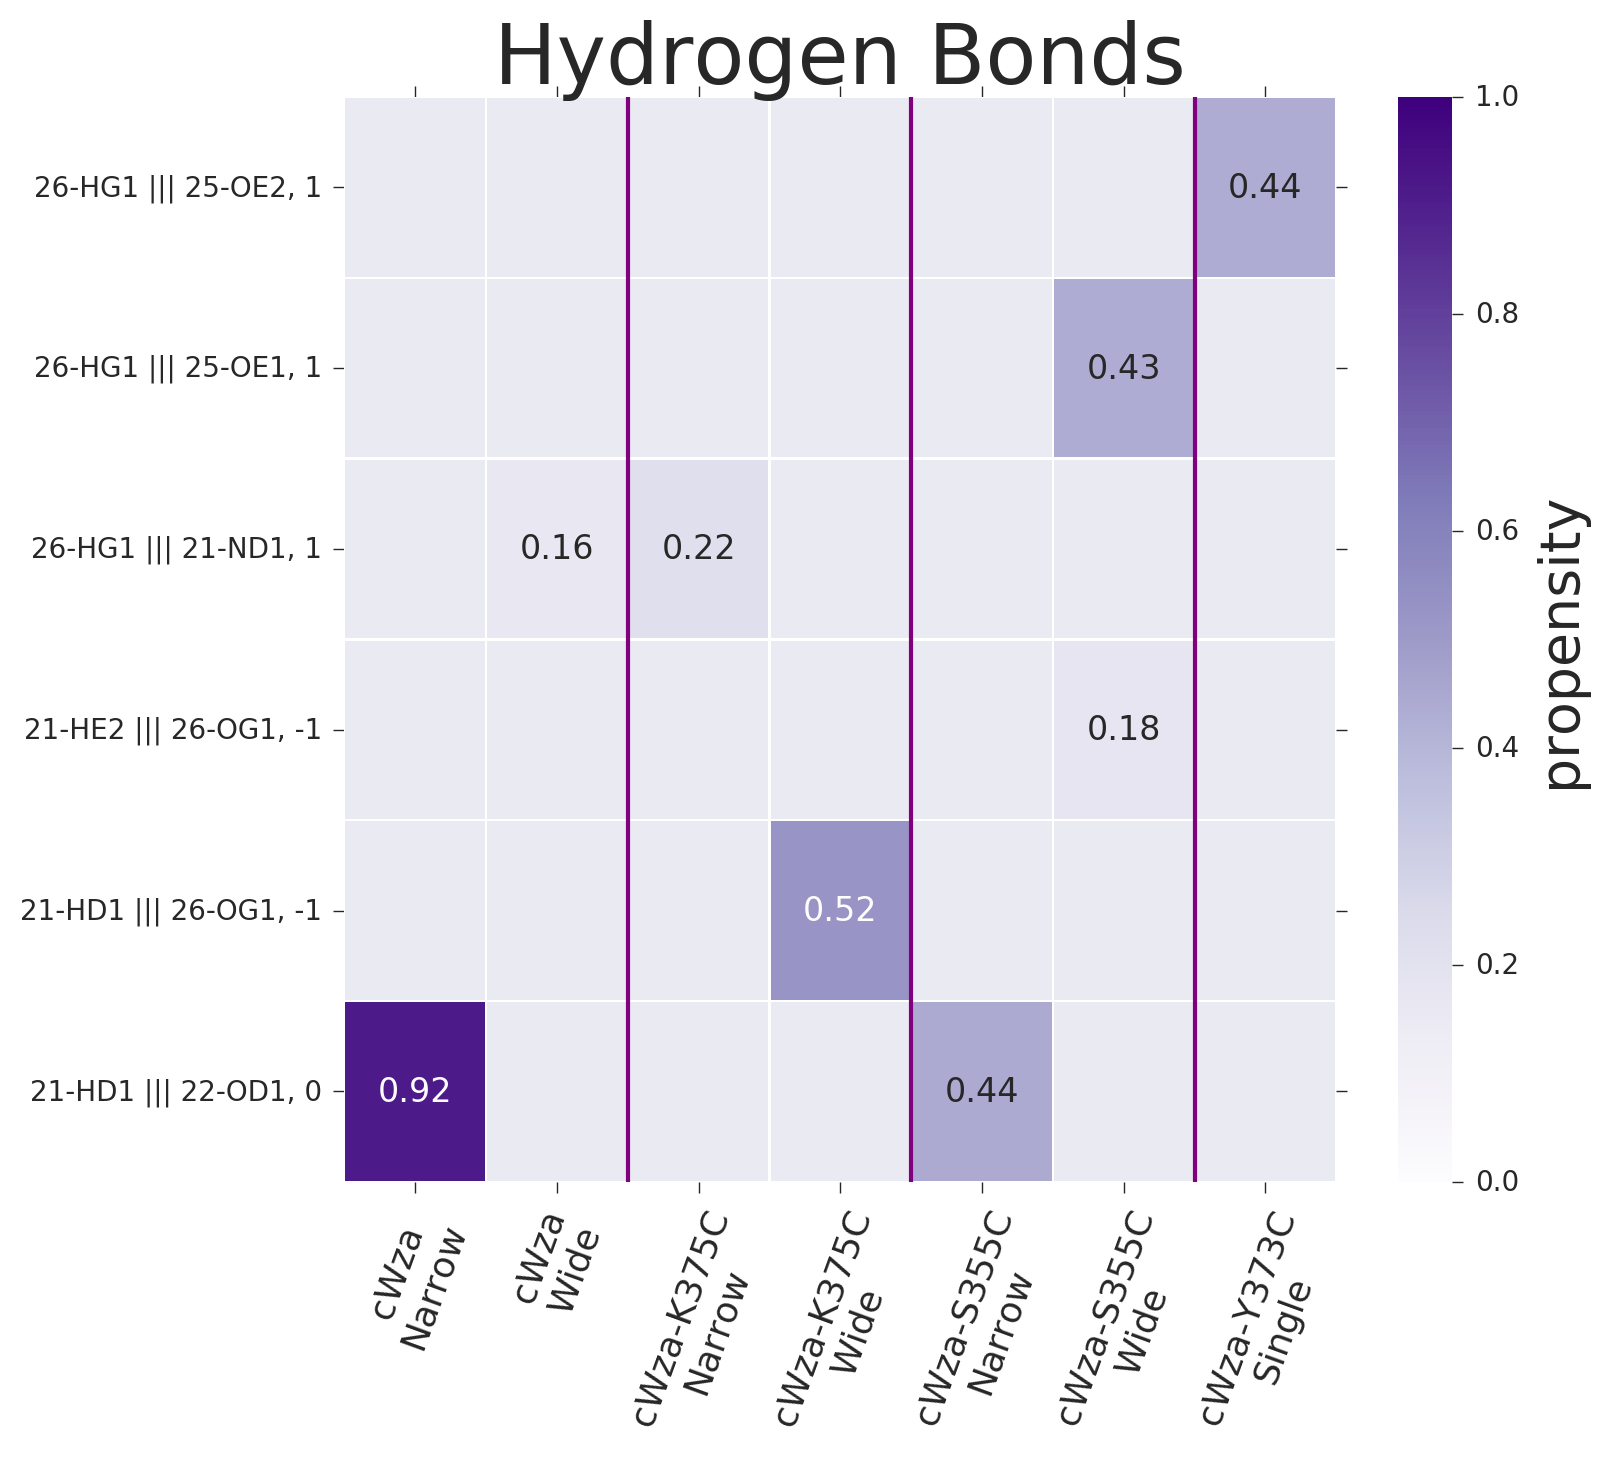

In [10]:
from itertools import permutations
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy
import json
import sys

sns.set_style("darkgrid")
#########################################################
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']
#########################################################
# inter = sys.argv[1]
inter = 'hbonds'

# Dataframe definition
df_name = 'df_'+inter+'_docked2prmd.json'

workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/dfs/'
df_path = workdir+df_name

with open(df_path, 'r') as fp:
    df_all = pd.DataFrame(json.load(fp))

df_all = df_all.fillna(0)

sbase_refined = list(list(df_all.index))

if inter == 'hbonds':
    rank = [(int(sbase_refined[i].split('-')[0]), i)
            for i in range(len(sbase_refined))]
elif inter == 'kihs':
    rank = [(int(sbase_refined[i].split('>>')[0]), i)
            for i in range(len(sbase_refined))]

sorted_sbase = itemgetter(
    *[x[1] for x in sorted(rank, key=itemgetter(0))])(sbase_refined)

df_all = df_all.reindex(list(sorted_sbase))

df_mutant = {}
COUNTER = 0

stage_init = 'docked'
stage_last = 'prmd'

for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    if mutant != 'cWza-Y373C':
        columns = [0+COUNTER, 14+COUNTER, 1+COUNTER, 15+COUNTER]
        columns_renamed = ['C0:'+stage_init, 'C0:' +
                           stage_last, 'C1:'+stage_init, 'C1:'+stage_last]
    else:
        columns = [0+COUNTER, 14+COUNTER]
        columns_renamed = ['C1:'+stage_init, 'C1:'+stage_last]
    df_mutant[mutant] = df_all[list(map(str, columns))]
    df_mutant[mutant].columns = columns_renamed
    COUNTER += 2

# Fix mislabelling for cWza-K375C mutant

columns_switched = ['C0:docked', 'C1:' +
                    stage_last, 'C1:docked', 'C0:'+stage_last]
df_mutant['cWza-K375C'].columns = columns_switched

# Probability Metrics
df_P = {}
df_dP = {}
df_ddP = {}
assessment = pd.DataFrame()

delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.2  # threshold values

for mutant in mutant_names:
    if mutant != 'cWza-Y373C':
        conformations = ['C0', 'C1']
    elif mutant == 'cWza-Y373C':
        conformations = ['C1']

    md_stages = ['docked', 'prmd']

    if mutant != 'cWza-Y373C':
        columns_stage_init = ['C0:'+stage_init, 'C1:'+stage_init]
        columns_stage_last = ['C0:'+stage_last, 'C1:'+stage_last]
        columns_stage_all = columns_stage_init + columns_stage_last
    elif mutant == 'cWza-Y373C':
        columns_stage_all = ['C1:'+stage_init, 'C1:'+stage_last]
    # <<<<
    df_P[mutant] = df_mutant[mutant]

    if mutant != 'cWza-Y373C':
        df_dP[mutant] = pd.DataFrame()

        for C_xy in list(permutations(conformations, 2)):
            C_x = C_xy[0]
            C_y = C_xy[1]
            for stage in md_stages:
                # Porbability difference, identical MD stage
                df_dP[mutant][C_x+':'+stage] = df_P[mutant][C_x +
                                                            ':'+stage] - df_P[mutant][C_y+':'+stage]

        df_ddP[mutant] = pd.DataFrame()

        for C_x in conformations:
            df_ddP[mutant][C_x] = abs(
                df_dP[mutant][C_x+':'+md_stages[-1]] - df_dP[mutant][C_x+':'+md_stages[0]])
        #####################################
        # Interaction assessment
        #####################################
        for C_x in conformations:
            # Significance of interactions
            test_0 = df_P[mutant][[C_x+':'+stage_init]] > delta_0
            test_0.columns = ['result']
            # Relevance of interactions to Conformation
            test_1_0 = df_dP[mutant][[C_x+':'+stage_init]] > delta_1
            test_1_1 = df_dP[mutant][[C_x+':'+stage_last]] > delta_1
            test_1 = pd.DataFrame(
                test_1_0[C_x+':'+stage_init] & test_1_1[C_x+':'+stage_last])
            test_1.columns = ['result']
            # Robustnes of relevant interactions to conformation after MD
            test_2 = df_ddP[mutant][[C_x]] < delta_2
            test_2.columns = ['result']

            # Gather results
            result_overall = test_0['result'] & test_1['result'] & test_2['result']
            assessment[mutant+':'+C_x] = result_overall.apply(lambda x: int(x))
    #####################################
    elif mutant == 'cWza-Y373C':
        df_dP[mutant] = pd.DataFrame()

        # Porbability difference, identical MD stage
        C_x = conformations[0]
        df_dP[mutant][C_x] = df_P[mutant][C_x+':'+md_stages[-1]] - \
            df_P[mutant][C_x+':'+md_stages[0]]

        #####################################
        # Interaction assessment
        #####################################
        # Significance of interactions
        test_0 = df_P[mutant][[C_x+':'+stage_init]] > delta_0
        test_0.columns = ['result']
        # Robustnes of relevant interactions to conformation after MD
        test_1 = abs(df_P[mutant][C_x+':'+stage_init] -
                     df_P[mutant][C_x+':'+stage_last]) < delta_2
        test_1.columns = ['result']

        # Gather results
        result_overall = test_0['result'] & test_2['result']
        assessment[mutant+':'+C_x] = result_overall.apply(lambda x: int(x))

###############################################
for mutant in mutant_names:
    if mutant != 'cWza-Y373C':
        conformations = ['C0', 'C1']
    elif mutant == 'cWza-Y373C':
        conformations = ['C1']
    for C_x in conformations:
        assessment[mutant+':'+C_x] = df_P[mutant][C_x +
                                                  ':docked'].values * assessment[mutant+':'+C_x].values
###############################################
fig, ax = plt.subplots(1,1,figsize=(8,7),dpi=200)

df = assessment
df = df[(df.T != 0).any()]
#########################################
# Modify for X and Y axes labels
#########################################
raw_names_new = ['hbond-'+str(i+1) for i in range(len(df.index))]
raw_names_new.reverse()

column_names_new = []
for i in range(7):
    mutant, conf = df.columns[i].split(':')
    if mutant != 'cWza-Y373C':
        if conf == 'C0':
            conf_new = 'Narrow'
        elif conf == 'C1':
            conf_new = 'Wide'
    else:
        conf_new = 'Single'
    
    column_names_new.append("\n".join([mutant, conf_new]))
###############################################
data = df.iloc[::-1]

sns.heatmap(
    data,
    cmap='Purples',
    linewidths=0.5,
    linecolor='white',
    annot=True,
    annot_kws={"size": 12},
    cbar=True,
    cbar_kws={"label": "propensity"},
    vmin=0,
    vmax=1,
    mask= data <= 0.01,
    ax=ax
)

ax.set_title('Hydrogen Bonds', fontsize=30)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.set_xticklabels(column_names_new,fontsize=13,rotation=70)
# ax.set_yticklabels (raw_names_new,fontsize=13,rotation=0)


for i in range(1,4):
    ax.plot((2*i,2*i),(0,6),color='purple',linewidth=1.5)

plt.show()
fig.tight_layout()

### KIHs

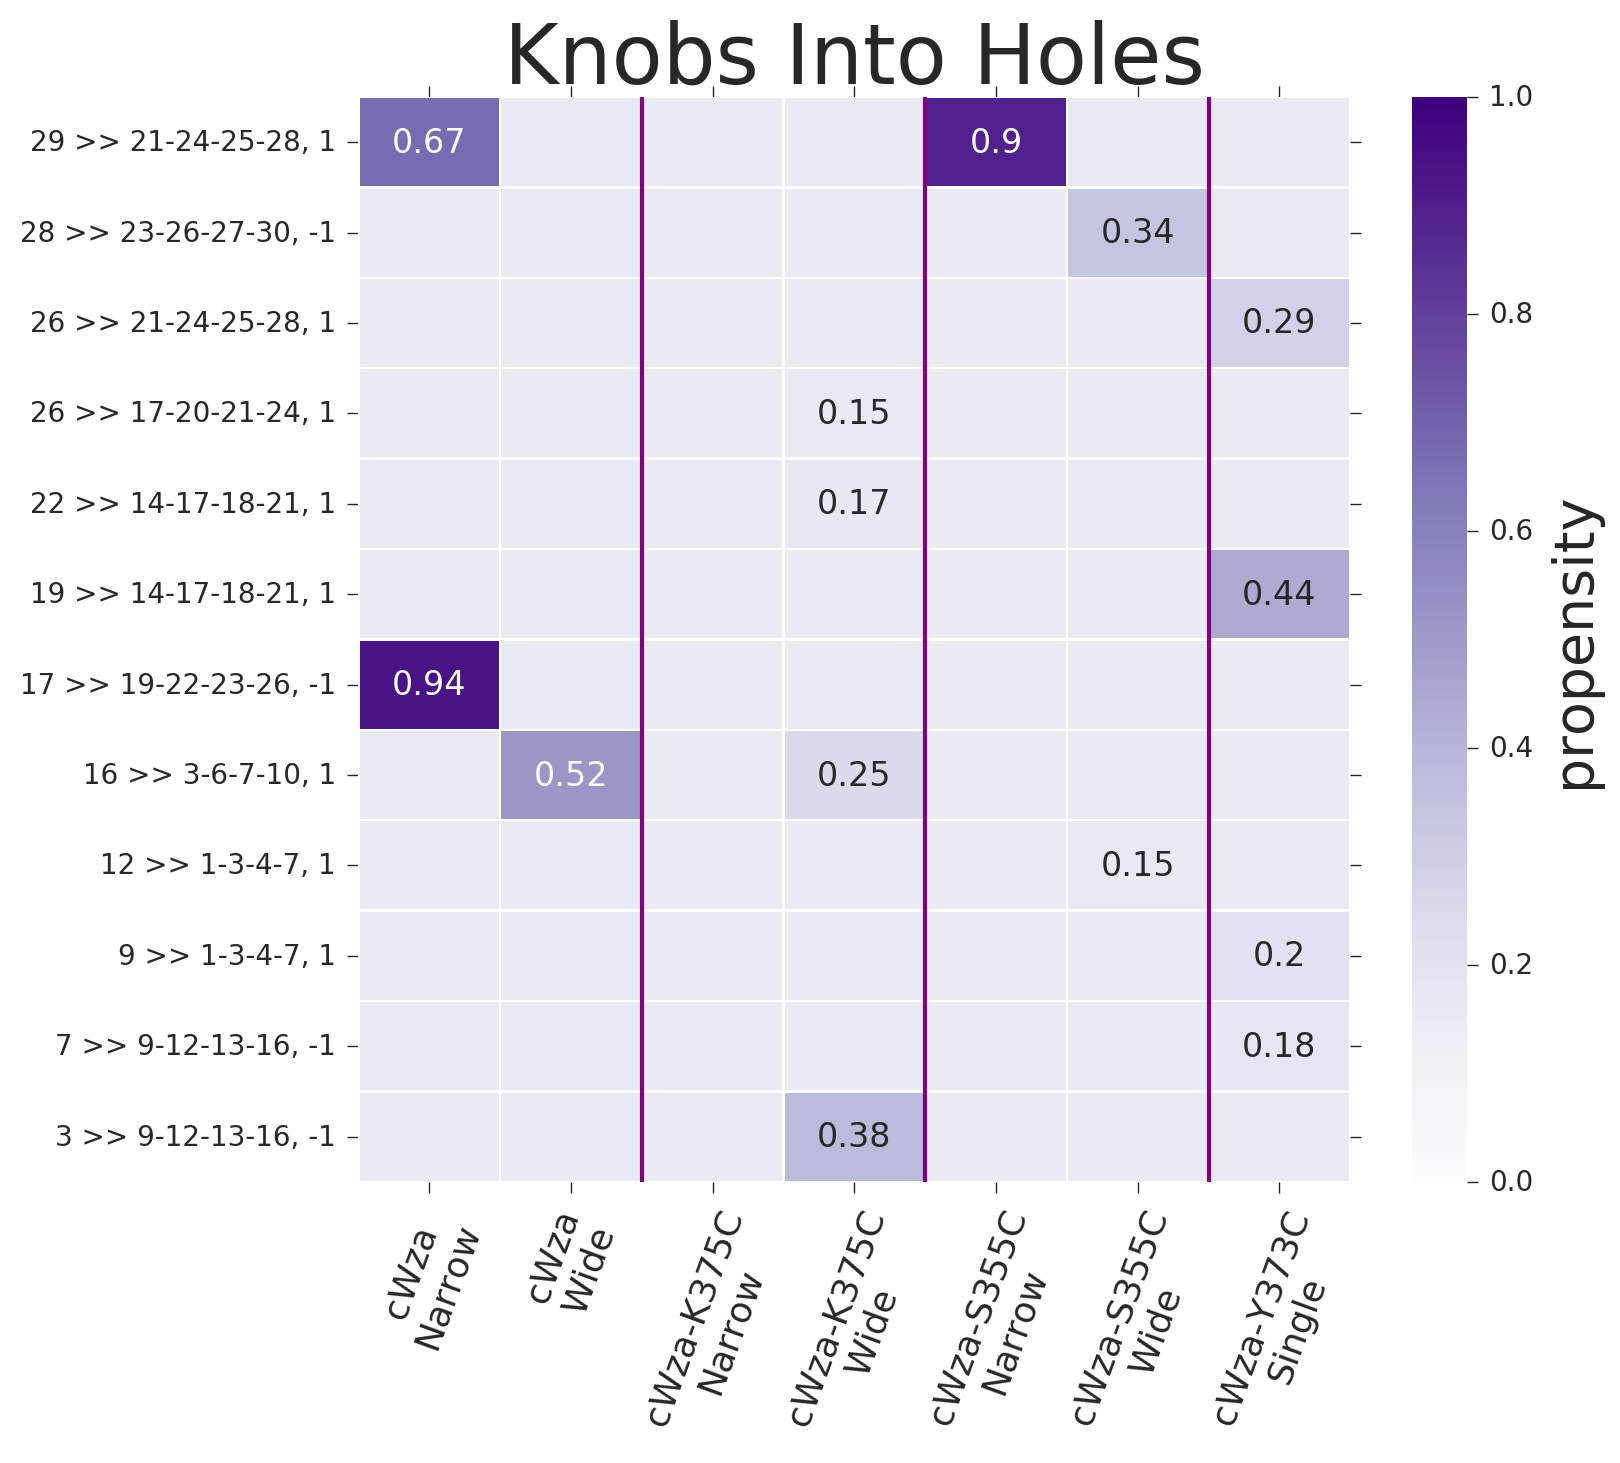

In [14]:
from itertools import permutations
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy
import json
import sys

sns.set_style("darkgrid")
#########################################################
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']
#########################################################
# inter = sys.argv[1]
inter = 'kihs'

# Dataframe definition
df_name = 'df_'+inter+'_docked2prmd.json'

workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/dfs/'
df_path = workdir+df_name

with open(df_path, 'r') as fp:
    df_all = pd.DataFrame(json.load(fp))

df_all = df_all.fillna(0)

sbase_refined = list(list(df_all.index))

if inter == 'hbonds':
    rank = [(int(sbase_refined[i].split('-')[0]), i)
            for i in range(len(sbase_refined))]
elif inter == 'kihs':
    rank = [(int(sbase_refined[i].split('>>')[0]), i)
            for i in range(len(sbase_refined))]

sorted_sbase = itemgetter(
    *[x[1] for x in sorted(rank, key=itemgetter(0))])(sbase_refined)

df_all = df_all.reindex(list(sorted_sbase))

df_mutant = {}
COUNTER = 0

stage_init = 'docked'
stage_last = 'prmd'

for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    if mutant != 'cWza-Y373C':
        columns = [0+COUNTER, 14+COUNTER, 1+COUNTER, 15+COUNTER]
        columns_renamed = ['C0:'+stage_init, 'C0:' +
                           stage_last, 'C1:'+stage_init, 'C1:'+stage_last]
    else:
        columns = [0+COUNTER, 14+COUNTER]
        columns_renamed = ['C1:'+stage_init, 'C1:'+stage_last]
    df_mutant[mutant] = df_all[list(map(str, columns))]
    df_mutant[mutant].columns = columns_renamed
    COUNTER += 2

# Fix mislabelling for cWza-K375C mutant

columns_switched = ['C0:docked', 'C1:' +
                    stage_last, 'C1:docked', 'C0:'+stage_last]
df_mutant['cWza-K375C'].columns = columns_switched

# Probability Metrics
df_P = {}
df_dP = {}
df_ddP = {}
assessment = pd.DataFrame()

delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.2  # threshold values

for mutant in mutant_names:
    if mutant != 'cWza-Y373C':
        conformations = ['C0', 'C1']
    elif mutant == 'cWza-Y373C':
        conformations = ['C1']

    md_stages = ['docked', 'prmd']

    if mutant != 'cWza-Y373C':
        columns_stage_init = ['C0:'+stage_init, 'C1:'+stage_init]
        columns_stage_last = ['C0:'+stage_last, 'C1:'+stage_last]
        columns_stage_all = columns_stage_init + columns_stage_last
    elif mutant == 'cWza-Y373C':
        columns_stage_all = ['C1:'+stage_init, 'C1:'+stage_last]
    # <<<<
    df_P[mutant] = df_mutant[mutant]

    if mutant != 'cWza-Y373C':
        df_dP[mutant] = pd.DataFrame()

        for C_xy in list(permutations(conformations, 2)):
            C_x = C_xy[0]
            C_y = C_xy[1]
            for stage in md_stages:
                # Porbability difference, identical MD stage
                df_dP[mutant][C_x+':'+stage] = df_P[mutant][C_x +
                                                            ':'+stage] - df_P[mutant][C_y+':'+stage]

        df_ddP[mutant] = pd.DataFrame()

        for C_x in conformations:
            df_ddP[mutant][C_x] = abs(
                df_dP[mutant][C_x+':'+md_stages[-1]] - df_dP[mutant][C_x+':'+md_stages[0]])
        #####################################
        # Interaction assessment
        #####################################
        for C_x in conformations:
            # Significance of interactions
            test_0 = df_P[mutant][[C_x+':'+stage_init]] > delta_0
            test_0.columns = ['result']
            # Relevance of interactions to Conformation
            test_1_0 = df_dP[mutant][[C_x+':'+stage_init]] > delta_1
            test_1_1 = df_dP[mutant][[C_x+':'+stage_last]] > delta_1
            test_1 = pd.DataFrame(
                test_1_0[C_x+':'+stage_init] & test_1_1[C_x+':'+stage_last])
            test_1.columns = ['result']
            # Robustnes of relevant interactions to conformation after MD
            test_2 = df_ddP[mutant][[C_x]] < delta_2
            test_2.columns = ['result']

            # Gather results
            result_overall = test_0['result'] & test_1['result'] & test_2['result']
            assessment[mutant+':'+C_x] = result_overall.apply(lambda x: int(x))
    #####################################
    elif mutant == 'cWza-Y373C':
        df_dP[mutant] = pd.DataFrame()

        # Porbability difference, identical MD stage
        C_x = conformations[0]
        df_dP[mutant][C_x] = df_P[mutant][C_x+':'+md_stages[-1]] - \
            df_P[mutant][C_x+':'+md_stages[0]]

        #####################################
        # Interaction assessment
        #####################################
        # Significance of interactions
        test_0 = df_P[mutant][[C_x+':'+stage_init]] > delta_0
        test_0.columns = ['result']
        # Robustnes of relevant interactions to conformation after MD
        test_1 = abs(df_P[mutant][C_x+':'+stage_init] -
                     df_P[mutant][C_x+':'+stage_last]) < delta_2
        test_1.columns = ['result']

        # Gather results
        result_overall = test_0['result'] & test_2['result']
        assessment[mutant+':'+C_x] = result_overall.apply(lambda x: int(x))

###############################################
for mutant in mutant_names:
    if mutant != 'cWza-Y373C':
        conformations = ['C0', 'C1']
    elif mutant == 'cWza-Y373C':
        conformations = ['C1']
    for C_x in conformations:
        assessment[mutant+':'+C_x] = df_P[mutant][C_x +
                                                  ':docked'].values * assessment[mutant+':'+C_x].values
###############################################
fig, ax = plt.subplots(1,1,figsize=(8,7),dpi=200)

df = assessment
df = df[(df.T != 0).any()]
#########################################
# Modify for X and Y axes labels
#########################################
raw_names_new = ['hbond-'+str(i+1) for i in range(len(df.index))]
raw_names_new.reverse()

column_names_new = []
for i in range(7):
    mutant, conf = df.columns[i].split(':')
    if mutant != 'cWza-Y373C':
        if conf == 'C0':
            conf_new = 'Narrow'
        elif conf == 'C1':
            conf_new = 'Wide'
    else:
        conf_new = 'Single'
    
    column_names_new.append("\n".join([mutant, conf_new]))
###############################################
data = df.iloc[::-1]

sns.heatmap(
    data,
    cmap='Purples',
    linewidths=0.5,
    linecolor='white',
    annot=True,
    annot_kws={"size": 12},
    cbar=True,
    cbar_kws={"label": "propensity"},
    vmin=0,
    vmax=1,
    mask= data <= 0.01,
    ax=ax
)

ax.set_title('Knobs Into Holes', fontsize=30)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.set_xticklabels(column_names_new,fontsize=13,rotation=70)
# ax.set_yticklabels (raw_names_new,fontsize=13,rotation=0)


for i in range(1,4):
    ax.plot((2*i,2*i),(0,12),color='purple',linewidth=1.5)

plt.show()
fig.tight_layout()

## Heatmap of interactions: Implicit labels

### H-bonds

<IPython.core.display.Javascript object>


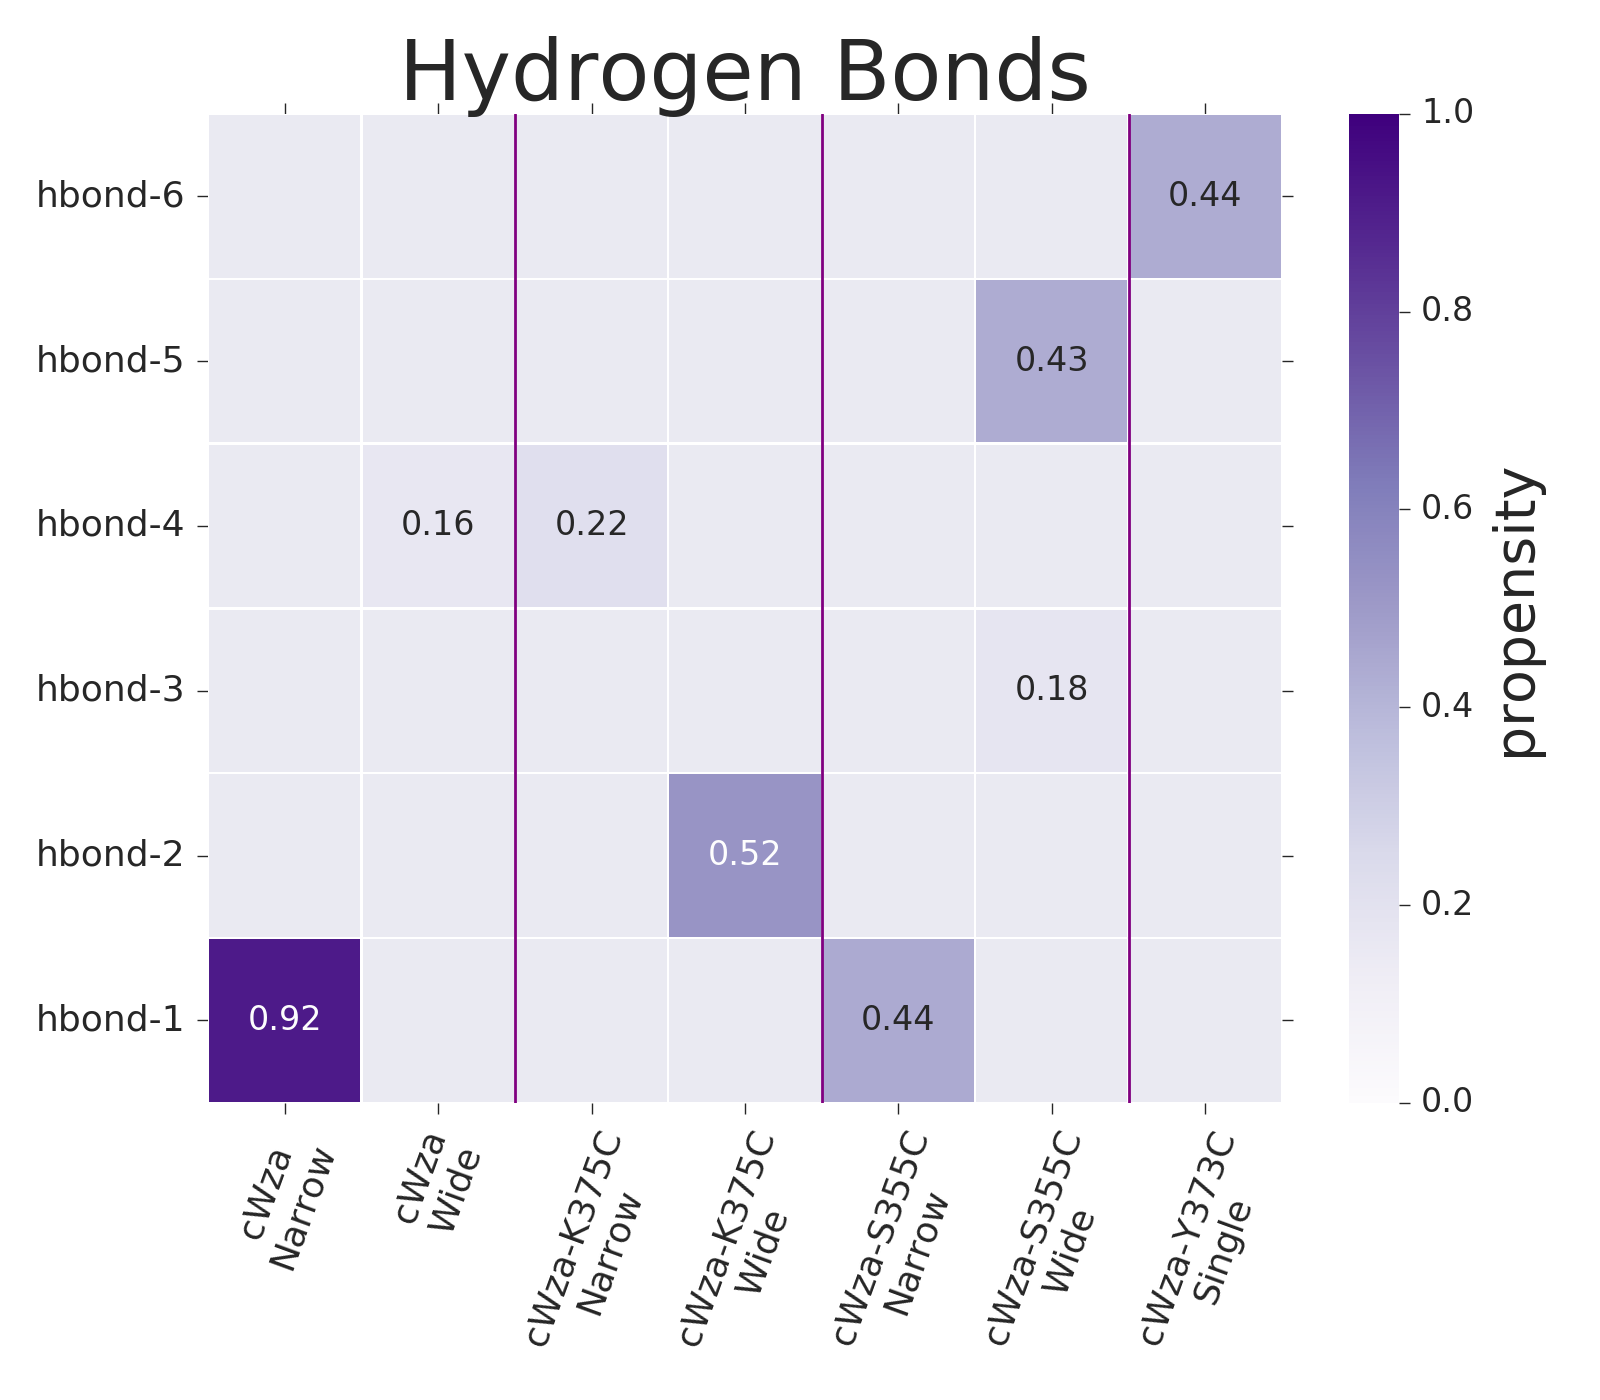

In [206]:
fig, ax = plt.subplots(1,1, figsize=(8,7),dpi=200)

df = assessment
df = df[(df.T != 0).any()]

#########################################
# Modify for X and Y axes labels
#########################################
raw_names_new = ['hbond-'+str(i+1) for i in range(len(df.index))]
raw_names_new.reverse()

column_names_new = []
for i in range(7):
    mutant, conf = df.columns[i].split(':')
    if mutant != 'cWza-Y373C':
        if conf == 'C0':
            conf_new = 'Narrow'
        elif conf == 'C1':
            conf_new = 'Wide'
    else:
        conf_new = 'Single'
    
    column_names_new.append("\n".join([mutant, conf_new]))
#########################################
data = df.iloc[::-1]

sns.heatmap(
    data,
    cmap='Purples',
    linewidths=0.5,
    linecolor='white',
    annot=True,
    annot_kws={"size": 12},
    cbar=True,
    cbar_kws= {"label": "propensity"},
    vmin=0,
    vmax=1,
    mask= data <=0.1,
    ax=ax
)

ax.set_title('Hydrogen Bonds', fontsize=30)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.set_xticklabels(column_names_new,fontsize=13,rotation=70)
ax.set_yticklabels(raw_names_new,fontsize=13,rotation=0)

for text, show_annot in zip(ax.texts, (element for row in show_annot_array for element in row)):
    text.set_visible(show_annot)

for i in range(1,4):
    ax.plot((2*i,2*i),(0,6),color='purple',linewidth=1)

fig.tight_layout()

### KIHs

<IPython.core.display.Javascript object>


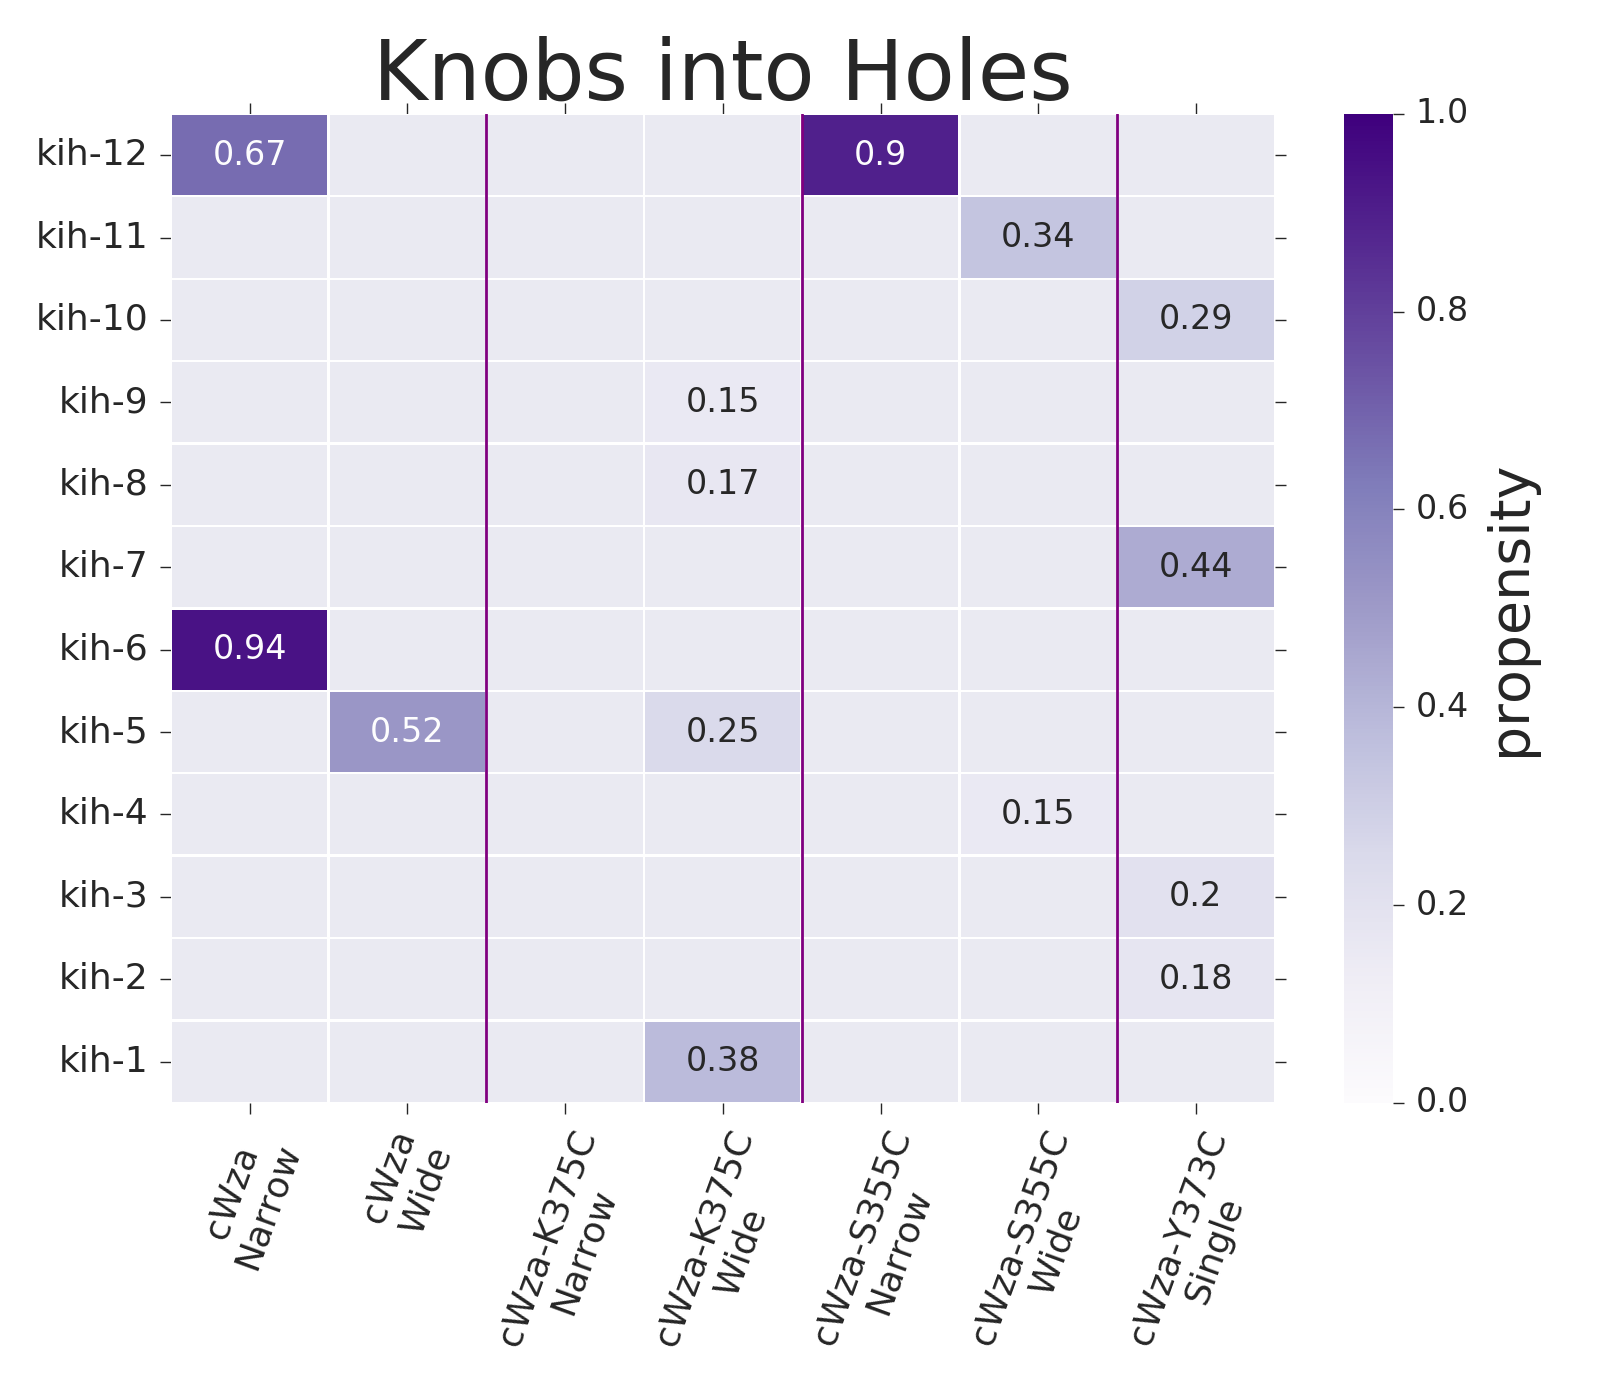

In [203]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(8,7),dpi=200)

df = assessment
df = df[(df.T != 0).any()]

#########################################
# Modify for X and Y axes labels
#########################################
raw_names_new = ['kih-'+str(i+1) for i in range(len(df.index))]
raw_names_new.reverse()

column_names_new = []
for i in range(7):
    mutant, conf = df.columns[i].split(':')
    if mutant != 'cWza-Y373C':
        if conf == 'C0':
            conf_new = 'Narrow'
        elif conf == 'C1':
            conf_new = 'Wide'
    else:
        conf_new = 'Single'
    
    column_names_new.append("\n".join([mutant, conf_new]))
#########################################
data = df.iloc[::-1]

sns.heatmap(
    data,
    cmap='Purples',
    linewidths=0.5,
    linecolor='white',
    annot=True,
    annot_kws={"size": 12},
    cbar=True,
    cbar_kws= {"label": "propensity"},
    vmin=0,
    vmax=1,
    mask= data <=0.1,
    ax=ax
)

ax.set_title('Knobs into Holes', fontsize=30)
ax.figure.axes[-1].yaxis.label.set_size(20)

ax.set_xticklabels(column_names_new,fontsize=13,rotation=70)
ax.set_yticklabels(raw_names_new,fontsize=13,rotation=0)

for text, show_annot in zip(ax.texts, (element for row in show_annot_array for element in row)):
    text.set_visible(show_annot)

for i in range(1,4):
    ax.plot((2*i,2*i),(0,12),color='purple',linewidth=1)

fig.tight_layout()

In [10]:
%%writefile /projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/get_figs_inter_assess.py
from itertools import permutations
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy
import json
import sys

plt.switch_backend('agg')
sns.set_style("darkgrid")
#########################################################
mutant_names = ['cWza', 'cWza-K375C', 'cWza-S355C', 'cWza-Y373C']
#########################################################
inter = sys.argv[1]
# inter = 'hbonds'

# Dataframe definition
df_name = 'df_'+inter+'_docked2prmd.json'

workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/dfs/'
df_path = workdir+df_name

with open(df_path, 'r') as fp:
    df_all = pd.DataFrame(json.load(fp))

df_all = df_all.fillna(0)

sbase_refined = list(list(df_all.index))

if inter == 'hbonds':
    rank = [(int(sbase_refined[i].split('-')[0]), i)
            for i in range(len(sbase_refined))]
elif inter == 'kihs':
    rank = [(int(sbase_refined[i].split('>>')[0]), i)
            for i in range(len(sbase_refined))]

sorted_sbase = itemgetter(
    *[x[1] for x in sorted(rank, key=itemgetter(0))])(sbase_refined)

df_all = df_all.reindex(list(sorted_sbase))

df_mutant = {}
COUNTER = 0

stage_init = 'docked'
stage_last = 'prmd'

for i in range(len(mutant_names)):
    mutant = mutant_names[i]
    if mutant != 'cWza-Y373C':
        columns = [0+COUNTER, 14+COUNTER, 1+COUNTER, 15+COUNTER]
        columns_renamed = ['C0:'+stage_init, 'C0:' +
                           stage_last, 'C1:'+stage_init, 'C1:'+stage_last]
    else:
        columns = [0+COUNTER, 14+COUNTER]
        columns_renamed = ['C1:'+stage_init, 'C1:'+stage_last]
    df_mutant[mutant] = df_all[list(map(str, columns))]
    df_mutant[mutant].columns = columns_renamed
    COUNTER += 2

# Fix mislabelling for cWza-K375C mutant

columns_switched = ['C0:docked', 'C1:' +
                    stage_last, 'C1:docked', 'C0:'+stage_last]
df_mutant['cWza-K375C'].columns = columns_switched

# Probability Metrics
df_P = {}
df_dP = {}
df_ddP = {}
assessment = pd.DataFrame()

delta_0 = 0.1
delta_1 = 0.1
delta_2 = 0.2  # threshold values

for mutant in mutant_names:
    if mutant != 'cWza-Y373C':
        conformations = ['C0', 'C1']
    elif mutant == 'cWza-Y373C':
        conformations = ['C1']

    md_stages = ['docked', 'prmd']

    if mutant != 'cWza-Y373C':
        columns_stage_init = ['C0:'+stage_init, 'C1:'+stage_init]
        columns_stage_last = ['C0:'+stage_last, 'C1:'+stage_last]
        columns_stage_all = columns_stage_init + columns_stage_last
    elif mutant == 'cWza-Y373C':
        columns_stage_all = ['C1:'+stage_init, 'C1:'+stage_last]
    # <<<<
    df_P[mutant] = df_mutant[mutant]

    if mutant != 'cWza-Y373C':
        df_dP[mutant] = pd.DataFrame()

        for C_xy in list(permutations(conformations, 2)):
            C_x = C_xy[0]
            C_y = C_xy[1]
            for stage in md_stages:
                # Porbability difference, identical MD stage
                df_dP[mutant][C_x+':'+stage] = df_P[mutant][C_x +
                                                            ':'+stage] - df_P[mutant][C_y+':'+stage]

        df_ddP[mutant] = pd.DataFrame()

        for C_x in conformations:
            df_ddP[mutant][C_x] = abs(
                df_dP[mutant][C_x+':'+md_stages[-1]] - df_dP[mutant][C_x+':'+md_stages[0]])
        #####################################
        # Interaction assessment
        #####################################
        for C_x in conformations:
            # Significance of interactions
            test_0 = df_P[mutant][[C_x+':'+stage_init]] > delta_0
            test_0.columns = ['result']
            # Relevance of interactions to Conformation
            test_1_0 = df_dP[mutant][[C_x+':'+stage_init]] > delta_1
            test_1_1 = df_dP[mutant][[C_x+':'+stage_last]] > delta_1
            test_1 = pd.DataFrame(
                test_1_0[C_x+':'+stage_init] & test_1_1[C_x+':'+stage_last])
            test_1.columns = ['result']
            # Robustnes of relevant interactions to conformation after MD
            test_2 = df_ddP[mutant][[C_x]] < delta_2
            test_2.columns = ['result']

            # Gather results
            result_overall = test_0['result'] & test_1['result'] & test_2['result']
            assessment[mutant+':'+C_x] = result_overall.apply(lambda x: int(x))
    #####################################
    elif mutant == 'cWza-Y373C':
        df_dP[mutant] = pd.DataFrame()

        # Porbability difference, identical MD stage
        C_x = conformations[0]
        df_dP[mutant][C_x] = df_P[mutant][C_x+':'+md_stages[-1]] - \
            df_P[mutant][C_x+':'+md_stages[0]]

        #####################################
        # Interaction assessment
        #####################################
        # Significance of interactions
        test_0 = df_P[mutant][[C_x+':'+stage_init]] > delta_0
        test_0.columns = ['result']
        # Robustnes of relevant interactions to conformation after MD
        test_1 = abs(df_P[mutant][C_x+':'+stage_init] -
                     df_P[mutant][C_x+':'+stage_last]) < delta_2
        test_1.columns = ['result']

        # Gather results
        result_overall = test_0['result'] & test_2['result']
        assessment[mutant+':'+C_x] = result_overall.apply(lambda x: int(x))
        ####################################

    fig, ax = plt.subplots(1, len(
        conformations)+1, figsize=(22*len(conformations), 22), dpi=500, sharey=True)
    #########################################
    # Probability values
    #########################################
    if mutant != 'cWza-Y373C':
        df_P[mutant][columns_stage_all].plot(
            kind='barh',
            ax=ax[0],
            color=2*['blue', 'green']
        )
        hatches = '  //'
    else:
        df_P[mutant][columns_stage_all].plot(
            kind='barh',
            ax=ax[0],
            color=['green', 'green']
        )
        hatches = ' /'

    bars = ax[0].patches
    hatches = ''.join(h*len(df_P[mutant]) for h in hatches)

    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

#     ax[0].legend(loc='center right', bbox_to_anchor=(0.5, 1.08), ncol=1)
    ax[0].legend('', loc='best', ncol=1)
    ax[0].set_title("Probability-"+inter+" : "+mutant, fontsize=30)
    #
    ax[0].plot((delta_0, delta_0), (-1, len(df_P[mutant])),
               linestyle='--', color='blue', alpha=1)
    ax[0].text(0.1, -1.5, "$\delta_0="+str(delta_0) +
               "$", fontsize=22, rotation=0)
    ax[0].set_xlim(0, 1)

    ax[0].tick_params(axis='y', which='major', labelsize=20)
    ax[0].tick_params(axis='x', which='major', labelsize=20)

    #########################################
    # Probability Difference values, docked models
    #########################################

    if mutant != 'cWza-Y373C':
        df_dP[mutant][columns_stage_all].plot(
            kind='barh',
            ax=ax[1],
            color=2*['blue', 'green']
        )
    else:
        df_dP[mutant].plot(
            kind='barh',
            ax=ax[1],
            color=['green', 'green']
        )

    bars = ax[1].patches
    hatches = ''.join(h*len(df_dP[mutant]) for h in '  //')

    for bar, hatch in zip(bars, hatches):
        bar.set_hatch(hatch)

#     ax[1].legend(loc='center right', bbox_to_anchor=(0.5, 1.08), ncol=1)
    ax[1].legend(loc='best', ncol=1, fontsize=20)
    ax[1].set_title("$\Delta$Probability-"+inter+" : "+mutant, fontsize=30)
    #
    ax[1].plot((delta_1, delta_1), (-1, len(df_P[mutant])),
               linestyle='--', color='blue', alpha=1)
    ax[1].text(0.1, -1.5, "$\delta_1="+str(delta_1) +
               "$", fontsize=22, rotation=0)
    ax[1].plot((0, 0), (-1, len(df_P[mutant])), color='black', alpha=1)
    ax[1].plot((-delta_1, -delta_1), (-1, len(df_P[mutant])),
               linestyle='--', color='blue', alpha=1)
    ax[1].set_ylabel('')
    ax[1].set_xlim(-1, 1)

    ax[1].tick_params(axis='x', which='major', labelsize=20)
    #########################################
    # Probability Double-Difference values
    #########################################
    if mutant != 'cWza-Y373C':
        df_ddP[mutant][conformations].plot(
            kind='barh',
            ax=ax[2],
            color=['blue', 'green']
        )
#         ax[2].legend(loc='best',bbox_to_anchor=(0.5, 1.08), ncol=1)
        ax[2].legend(loc='best', ncol=1, fontsize=20)
        ax[2].set_title("$\Delta\Delta$Probability-" +
                        inter+" : "+mutant, fontsize=30)
        #
        ax[2].plot((delta_2, delta_2), (-1, len(df_P[mutant])),
                   linestyle='--', color='blue', alpha=1)
        ax[2].text(0.1, -1.5, "$\delta_2="+str(delta_2) +
                   "$", fontsize=22, rotation=0)
        ax[2].plot((0, 0), (-1, len(df_P[mutant])), color='black', alpha=1)
        ax[2].set_xlim(0, 1)
        ax[2].tick_params(axis='x', which='major', labelsize=20)

#         ax[2].set_ylabel(inter)

    plt.show()
    fig.tight_layout()

    outdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/figs/'
    filename = outdir+'raw_assessment_'+inter+'_'+mutant+'_docked-prmd.png'
    plt.savefig(filename)

###############################################
for mutant in mutant_names:
    if mutant != 'cWza-Y373C':
        conformations = ['C0', 'C1']
    elif mutant == 'cWza-Y373C':
        conformations = ['C1']
    for C_x in conformations:
        assessment[mutant+':'+C_x] = df_P[mutant][C_x +
                                                  ':docked'].values * assessment[mutant+':'+C_x].values
###############################################

fig, ax = plt.subplots(1, 1, figsize=(8, 7), dpi=200)

df = assessment
df = df[(df.T != 0).any()]

sns.heatmap(
    df.iloc[::-1],
    cmap='Blues',
    linewidths=0.5,
    linecolor='white',
    cbar=True,
    cbar_kws={"label": "probability"},
    ax=ax
)

ax.set_title(inter, fontsize=30)

plt.show()
fig.tight_layout()

df.to_json(outdir+'df_assessment_'+inter+'_docked-prmd.json')

outdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/figs/'
filename = outdir+'heatmap_assessment_'+inter+'_docked-prmd.png'
plt.savefig(filename)

Overwriting /projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/get_figs_inter_assess.py


## TO-DOs

* Save data from interaction assessments and use this to filter out model identities, for which interactions survive after PRMD phase.

* Tidy up code

* Fine tune functions 

# Interaction based structure classifier

**GOAL**: We want to obtain the identity of protein models according to a set of desired interchain interactions

## Proof of concept

In [575]:
# Features Type 0
model_features0 = ['a', 'x', 'e', 'h', 'l', 'w', 'b', 'c']
target_features0 = ['a', 'b', 'c']

# Features Type 1
model_features1 = [0, 30, 7, 20, 23, 4]
target_features1 = [20, 3, 10]

In [672]:
def model_has_all_features(model_features, target_features):
    model_assessment = set(target_features).issubset(set(model_features))
    model_missing = set(target_features) - set(model_features)
    return model_assessment, {'missing': list(model_missing)}

In [673]:
model_has_all_features(model_features0, target_features0)

(True, {'missing': []})

In [674]:
model_has_all_features(model_features1, target_features1)

(False, {'missing': [10, 3]})

## Application to real data

In [243]:
def model_has_all_features(model_features, target_features):
    model_assessment = set(target_features).issubset(set(model_features))
    model_missing = set(target_features) - set(model_features)
    return model_assessment, {'missing': list(model_missing)}

Define target interactions

In [244]:
import sys
import json
import numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from operator import itemgetter
from itertools import permutations
plt.switch_backend('agg')
sns.set_style("darkgrid")

In [245]:
wd = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/figs/'


def filter_interactions(df, column):
    target_inter = []
    for index in list(df[column][df[column] > 0].index):
        if inter == 'hbonds':
            separator = "|||"
            y = index.split(",")[0].split(separator)
            z = y[0].strip().split('-') + y[1].strip().split('-') + \
                [int(index.split(",")[-1])]
        elif inter == 'kihs':
            separator = ">>"
            y = index.split(",")[0].split(separator)
            z = [str(y[0].strip())] + y[1].strip().split('-') + \
                [int(index.split(",")[-1])]

        data_json = json.dumps(z)
        target_inter.append(data_json)

    return target_inter

Extract model interactions

In [246]:
import os
import sys
import numpy
import pandas as pd
import json
import subprocess
import isambard_dev
import operator
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns

from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
##########################################################
modules_paths = [
    "/home/ba13026/mpmodeling/analysis",
    "/home/ba13026/mpmodeling/protocols"
]

for path in modules_paths:
    if path not in sys.path:
        sys.path.append(path)
##########################################################
from geometry_interactions import Models, Analyse_Interactions, start_session, sort_superbase
import geometry_interactions
from insert2db_geometry_interactions import interaction_direction
from setup_geometry_interactions_db import \
    Json, Tags, RigidBody, RadialProfiles, Miscellaneous, Interhelix_Interactions, Base
import setup_geometry_interactions_db
from cluster_transfer import BG
##########################################################
WD = BG.workdir+'md_100ns_dbs/'
##########################################################


class MyDB:
    def __init__(self):
        self.db_path = ''
        self.name = ''
        self.tags = []
        self.id_extractor = ''


##########################################################
# DOCKED MODELS
docked = MyDB()
db_path = WD+'mutants_docked_geometry-interactions.db'
docked.db_path = db_path
docked.name = 'docked'
docked.tags = [
    json.dumps(['cWza', 'conformation0']),
    json.dumps(['cWza', 'conformation1']),
    json.dumps(['cWza-K375C', 'conformation0']),
    json.dumps(['cWza-K375C', 'conformation1']),
    json.dumps(['cWza-S355C', 'conformation0']),
    json.dumps(['cWza-S355C', 'conformation1']),
    json.dumps(['cWza-Y373C', 'conformation0'])
]

# STUFF FOR DATABASE ID EXTRACTION
with open(WD+'filtered_ids_new.json', 'r') as fp:
    Filtered_IDs = json.load(fp)


def extractor_docked(session, tags):
    mutant, group = json.loads(tags)
    return list(Filtered_IDs[mutant][group])


docked.id_extractor = extractor_docked

In [247]:
Columns = {
    json.dumps(['cWza', 'conformation0']): 'cWza:C0',
    json.dumps(['cWza', 'conformation1']): 'cWza:C1',
    json.dumps(['cWza-K375C', 'conformation0']): 'cWza-K375C:C1',
    json.dumps(['cWza-K375C', 'conformation1']): 'cWza-K375C:C0',
    json.dumps(['cWza-S355C', 'conformation0']): 'cWza-S355C:C0',
    json.dumps(['cWza-S355C', 'conformation1']): 'cWza-S355C:C1',
    json.dumps(['cWza-Y373C', 'conformation0']): 'cWza-Y373C:C1'
}

###################################################
Analyses = {}
Interaction_data = {}

Target_inter = {}
Models_Out = {}
Models_Out_IDs = {}
Models_All = {}
###################################################
stage = docked

Analyses[stage.name] = {}
Interaction_data[stage.name] = {}

MyTags = stage.tags
stage_session = start_session(stage.db_path)
models = Models(stage_session)

###################################################
for inter in ['hbonds', 'kihs']:
    df_test = pd.read_json(wd+'df_assessment_'+inter+'_docked-prmd.json')

    Analyses[stage.name][inter] = {}
    Interaction_data[stage.name][inter] = {}
    ###################################################
    Target_inter[inter] = {}
    Models_Out[inter] = {}
    Models_Out_IDs[inter] = {}
    Models_All[inter] = {}
    
    for tags in MyTags:
        ###################################################
        Target_inter[inter][tags] = filter_interactions(df_test, Columns[tags])
        ###################################################
        mutant, group = json.loads(tags)
        models.ids = stage.id_extractor(models.session, tags)

        analysis = Analyse_Interactions(models)
        Analyses[stage.name][inter][tags] = analysis
        Interaction_data[stage.name][inter][tags] = analysis.get_interaction_data(
            inter)

        Models_Out[inter][tags] = []
        Models_Out_IDs[inter][tags] = []
        for id in Interaction_data[stage.name][inter][tags].keys():
            model_inter_raw = list(
                Interaction_data[stage.name][inter][tags][id])

            Y = [json.dumps(x[:-1]+[interaction_direction(x[-1])])
                 for x in [json.loads(x) for x in model_inter_raw]]
            model_inter = list(set(Y))

            target_inter_in_model = model_has_all_features(
                model_inter, Target_inter[inter][tags])
            assessment_inter, missing_inter = target_inter_in_model
            #
            model_pdb = models.session.query(
                    Tags.pdb_name).filter_by(id=id).all()[0][0][:-4]
            if assessment_inter:
                Models_Out[inter][tags].append(model_pdb)
                Models_Out_IDs[inter][tags].append(id)

In [251]:
wd = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/'
filename = wd+'filtered_ids_interaction_groups.json'
with open(filename,'w') as fp:
    json.dump(Models_Out_IDs, fp, indent=4)

Get pdb names for all conformational groups

In [254]:
Models_All = {}
for tags in MyTags:
    Models_All[tags] = []
    ###################################################
    mutant, group = json.loads(tags)
    models.ids = stage.id_extractor(models.session, tags)

    for id in models.ids:
        model_pdb = models.session.query(
                Tags.pdb_name).filter_by(id=id).all()[0][0][:-4]
        Models_All[tags].append(model_pdb)

In [255]:
for tags in MyTags:
    N = len(Models_All[tags])
    print(tags, N)

["cWza", "conformation0"] 436
["cWza", "conformation1"] 170
["cWza-K375C", "conformation0"] 60
["cWza-K375C", "conformation1"] 84
["cWza-S355C", "conformation0"] 183
["cWza-S355C", "conformation1"] 320
["cWza-Y373C", "conformation0"] 475


In [256]:
for inter in ['hbonds', 'kihs']:
    # Data has mislabels
    for tags in MyTags:
        N = len(Models_Out[inter][tags])
        print(inter, tags, N)

hbonds ["cWza", "conformation0"] 400
hbonds ["cWza", "conformation1"] 28
hbonds ["cWza-K375C", "conformation0"] 22
hbonds ["cWza-K375C", "conformation1"] 9
hbonds ["cWza-S355C", "conformation0"] 81
hbonds ["cWza-S355C", "conformation1"] 32
hbonds ["cWza-Y373C", "conformation0"] 209
kihs ["cWza", "conformation0"] 291
kihs ["cWza", "conformation1"] 88
kihs ["cWza-K375C", "conformation0"] 0
kihs ["cWza-K375C", "conformation1"] 84
kihs ["cWza-S355C", "conformation0"] 164
kihs ["cWza-S355C", "conformation1"] 0
kihs ["cWza-Y373C", "conformation0"] 4


Compare models with sampled ones for EMMD

**Models in sample**

In [257]:
file = BG.workdir + 'EMMD_Sample.json'
with open(file,'r') as fp:
    Models_sample_list = json.load(fp)

Models_sample = {}
for tags in MyTags:
    Models_sample[tags] = []

for x in Models_sample_list:
    mutant,C_x,pdb_name = x.split("/")
    ##################################
    # Correct mislabelling
    if mutant == 'cWza-Y373C':
        C_x = "conformation0"
    elif mutant == 'cWza-K375C' and C_x == "conformation0":
        C_x = "conformation1"
    elif mutant == 'cWza-K375C' and C_x == "conformation1":
        C_x = "conformation0"
    ##################################
    tags = json.dumps([mutant, C_x])
    Models_sample[tags].append(pdb_name)

**Models in sample, completed URMD 100ns**

In [258]:
file = BG.workdir + 'FINISHED_md_100ns.txt'
Models_finished_list = [x.strip().split('/')[:3] for x in open(file,'r').readlines()]

Models_finished = {}
for tags in MyTags:
    Models_finished[tags] = []
    
for x in Models_finished_list:
    mutant,C_x,pdb_name = x
    ##################################
    # Correct mislabelling
    if mutant == 'cWza-Y373C':
        C_x = "conformation0"
    elif mutant == 'cWza-K375C' and C_x == "conformation0":
        C_x = "conformation1"
    elif mutant == 'cWza-K375C' and C_x == "conformation1":
        C_x = "conformation0"    
    ##################################
    tags = json.dumps([mutant, C_x])
    Models_finished[tags].append(pdb_name)

Second, check intersection between sample groups and filtered out groups with interactions

In [259]:
Models_to_submit = {}

for inter in ['hbonds', 'kihs']:
    Models_to_submit[inter] = {}
    for tags in MyTags: 
        X_inter = Models_Out[inter][tags]
        X_sample = Models_sample[tags]
        X_sample_urmd = Models_finished[tags]
        X_common_sample_inter = set(X_inter) & set(X_sample)
        X_common_urmd_inter = set(X_inter) & set(X_sample_urmd)
        X_remain = set(X_inter) - (set(X_sample_urmd) & set(X_inter))
        Models_to_submit[inter][tags] = list(X_remain)
        print(
            inter,
            tags,
            "In sample",
            len(X_sample),
            "URMD finished: ",
            len(X_sample_urmd),
            "With Interactions: ",
            len(X_inter),
            "In common: ",
            len(X_common_urmd_inter),
            "Remain: ",
            len(X_remain)
            )

hbonds ["cWza", "conformation0"] In sample 86 URMD finished:  60 With Interactions:  400 In common:  54 Remain:  346
hbonds ["cWza", "conformation1"] In sample 33 URMD finished:  17 With Interactions:  28 In common:  3 Remain:  25
hbonds ["cWza-K375C", "conformation0"] In sample 11 URMD finished:  7 With Interactions:  22 In common:  4 Remain:  18
hbonds ["cWza-K375C", "conformation1"] In sample 16 URMD finished:  9 With Interactions:  9 In common:  1 Remain:  8
hbonds ["cWza-S355C", "conformation0"] In sample 36 URMD finished:  16 With Interactions:  81 In common:  6 Remain:  75
hbonds ["cWza-S355C", "conformation1"] In sample 59 URMD finished:  34 With Interactions:  32 In common:  4 Remain:  28
hbonds ["cWza-Y373C", "conformation0"] In sample 97 URMD finished:  40 With Interactions:  209 In common:  15 Remain:  194
kihs ["cWza", "conformation0"] In sample 86 URMD finished:  60 With Interactions:  291 In common:  41 Remain:  250
kihs ["cWza", "conformation1"] In sample 33 URMD finish

**Correlation between interactions**

In [265]:
inter_corr = {}
inter_size = {}

for tags in MyTags:
    X_a = Models_Out['hbonds'][tags] 
    X_b = Models_Out['kihs'][tags]
    X_a_AND_b = set(X_a) & set(X_b)
    X_a_OR_b = set(X_a) | set(X_b)
    # Jaccard index
    Jaccard_index = len(X_a_AND_b)/len(X_a_OR_b)
    # Relative size
    X_size = (len(X_a)/float(len(X_a_OR_b)), len(X_b)/float(len(X_a_OR_b)))
    mutant, C_x = json.loads(tags)
    C_x = C_x[0].upper()+C_x[-1]
    ##################################
    # Correct mislabelling
    if mutant == 'cWza-Y373C':
        C_x = "C0"
#     elif mutant == 'cWza-K375C' and C_x == "C0":
#         C_x = "C1"
#     elif mutant == 'cWza-K375C' and C_x == "C1":
#         C_x = "C0"    
    ##################################
    new_tags = mutant+':'+C_x
    inter_corr[new_tags] = Jaccard_index
    inter_size[new_tags] = X_size

<IPython.core.display.Javascript object>


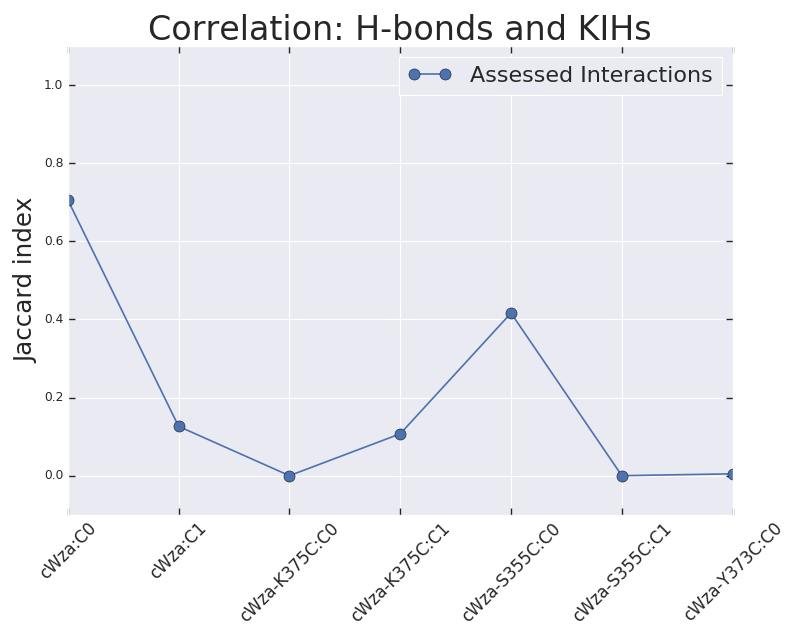

In [266]:
fig,ax = plt.subplots(1,1,figsize=(10,8),sharex=True)
sns.set()
Columns = [
    'cWza:C0',
    'cWza:C1',
    'cWza-K375C:C0',
    'cWza-K375C:C1',
    'cWza-S355C:C0',
    'cWza-S355C:C1',
    'cWza-Y373C:C0'
]
##################################
data = [inter_corr[key] for key in Columns]
ax.plot(range(len(Columns)),data,marker='o',markersize=10, label="Assessed Interactions")

# Customise plot appearance
ax.set_title("Correlation: H-bonds and KIHs",fontsize=30)
ax.set_ylabel("Jaccard index", fontsize=22)
ax.set_xticklabels(Columns, rotation=45, fontsize=15)
ax.tick_params(axis='both' , direction='in') 
ax.set_ylim(-0.1,1.1)

fig.tight_layout()
ax.legend(loc='best', fontsize=20)

plt.show()

<IPython.core.display.Javascript object>


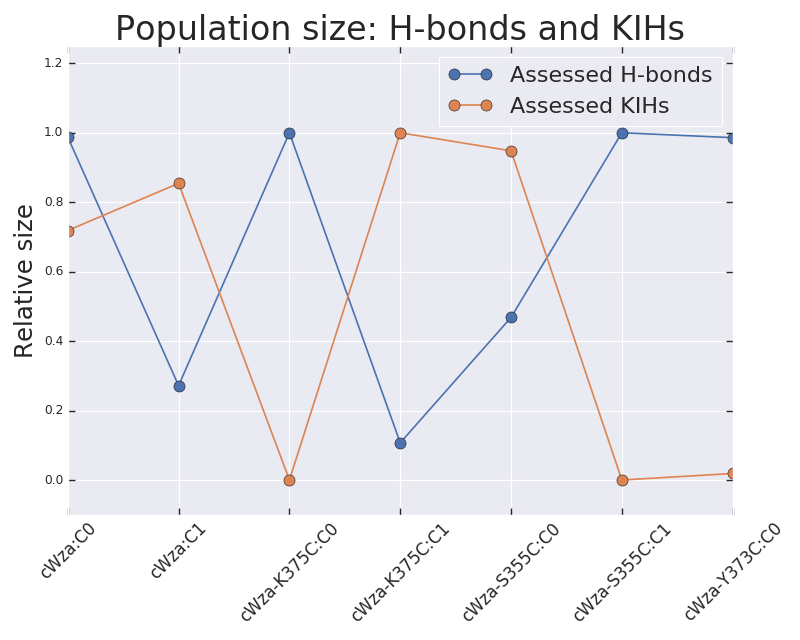

In [267]:
fig,ax = plt.subplots(1,1,figsize=(10,8))
sns.set()
Columns = [
    'cWza:C0',
    'cWza:C1',
    'cWza-K375C:C0',
    'cWza-K375C:C1',
    'cWza-S355C:C0',
    'cWza-S355C:C1',
    'cWza-Y373C:C0'
]
##################################
data0 = [inter_size[key][0] for key in Columns]
data1 = [inter_size[key][1] for key in Columns]

ax.plot(range(len(Columns)),data0,marker='o',markersize=10, label="Assessed H-bonds")
ax.plot(range(len(Columns)),data1,marker='o',markersize=10, label="Assessed KIHs")

ax.set_title("Population size: H-bonds and KIHs",fontsize=30)
ax.set_ylabel("Relative size", fontsize=22)
ax.set_xticklabels(Columns, rotation=45, fontsize=15)
ax.tick_params(axis='both' , direction='in') 
ax.set_ylim(-0.1,1.25)

fig.tight_layout()
ax.legend(loc='best', fontsize=20)

plt.show()

**MAIN ASSUMPTION**

Inter-chain interactions like H-bonds and KIHs keep the docked structures and conformations stable. So, we can intutively think that the more interactions we have, in a fixed conformation, the more stable this will be. Thus, when putting our docked models through MD, this indicates that the models with more variable interaction types and number, the more stable these will be (Protein stability problem).

**MAIN MESSAGE**:

Correlation or the degree of simultaneous presence of H-bonds and KIHs varies according to conformation for most models with cWza Cys-mutant sequences. However, if present, either H-bonds or KIHs will dominate more than the other whithin a conformational group. 

So, to test the above assumption we need to sample structures within the conformational group, according to the set partition provided by the set of structures that have all PRMD-robust H-bonds, the  set of structures that have all PRMD-robust H-bonds, the intersection between these, and the complement set of the union. 

## Sampling from interaction-based partition of conformational groups

In [268]:
Models_parition = {}

for tags in MyTags:
    X_all = set(Models_All[tags])
    X_hbonds = set(Models_Out['hbonds'][tags])
    X_kihs = set(Models_Out['kihs'][tags])
    X_hbonds_NOT_kihs = set(X_hbonds - X_kihs)
    X_kihs_NOT_hbonds = set(X_kihs - X_hbonds)
    X_hbonds_AND_kihs = set(X_hbonds & X_kihs)
    X_hbonds_NOR_kihs = X_all - set(X_hbonds | X_kihs)
    data = list(map(len, [
                X_all,
                X_hbonds_NOT_kihs,
                X_kihs_NOT_hbonds,
                X_hbonds_AND_kihs,
                X_hbonds_NOR_kihs
            ]))
    data = numpy.array(data)/data[0]
    Models_parition[tags] = data[1:]

In [271]:
df_partition = pd.DataFrame(Models_parition)

In [272]:
df_partition

,"[""cWza"", ""conformation0""]","[""cWza"", ""conformation1""]","[""cWza-K375C"", ""conformation0""]","[""cWza-K375C"", ""conformation1""]","[""cWza-S355C"", ""conformation0""]","[""cWza-S355C"", ""conformation1""]","[""cWza-Y373C"", ""conformation0""]"
0,0.261468,0.088235,0.366667,0.000000,0.049180,0.1,0.437895
1,0.011468,0.441176,0.000000,0.892857,0.502732,0.0,0.006316
2,0.655963,0.076471,0.000000,0.107143,0.393443,0.0,0.002105
3,0.071101,0.394118,0.633333,0.000000,0.054645,0.9,0.553684


In [273]:
Columns = [
    'cWza:C0',
    'cWza:C1',
    'cWza-K375C:C0',
    'cWza-K375C:C1',
    'cWza-S355C:C0',
    'cWza-S355C:C1',
    'cWza-Y373C:C0'
]

df_partition.columns = Columns

Labels = [
        "All H-bonds only",
        "All KIHs only",
        "All H-bonds AND all KIHs",
        "Not all H-bonds or all H-bonds"
]

df_partition.set_axis(Labels, axis = 0,inplace=True)

In [277]:
df_partition

,cWza:C0,cWza:C1,cWza-K375C:C0,cWza-K375C:C1,cWza-S355C:C0,cWza-S355C:C1,cWza-Y373C:C0
All H-bonds only,0.261468,0.088235,0.366667,0.000000,0.049180,0.1,0.437895
All KIHs only,0.011468,0.441176,0.000000,0.892857,0.502732,0.0,0.006316
All H-bonds AND all KIHs,0.655963,0.076471,0.000000,0.107143,0.393443,0.0,0.002105
Not all H-bonds or all H-bonds,0.071101,0.394118,0.633333,0.000000,0.054645,0.9,0.553684


<IPython.core.display.Javascript object>


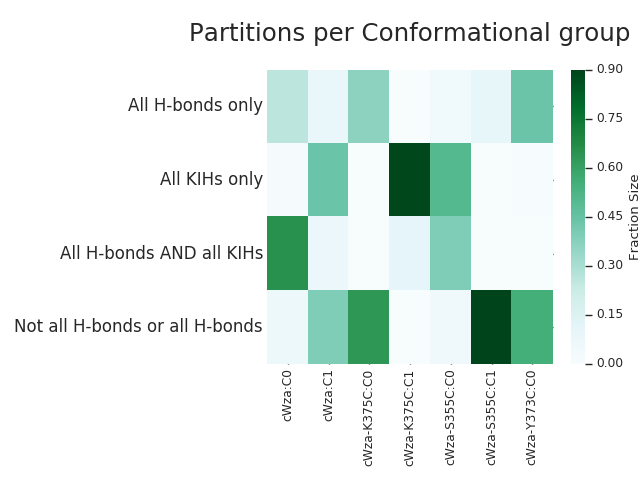

In [295]:
fig,ax = plt.subplots(1,1)

# df_partition.plot(kind='barh',ax=ax)
sns.heatmap(
    df_partition,
    cmap='BuGn', 
    cbar=True,
    cbar_kws={"label": "Fraction Size"},
    ax=ax
)


ax.set_title("Partitions per Conformational group", fontsize=22, y=1.08)

ax.set_yticklabels(Labels,fontsize=15)

ax.yaxis.set_label_position("right")

ax.tick_params(axis='both' , direction='in') 
# ax.legend(fontsize=12,bbox_to_anchor=(1, 0.85),ncol=1 )

# ax.set_xlim(0,1)

fig.tight_layout()
plt.show()

## Distribution of partition sets in Conformational Space

See Notebook: _Condensed Geometry-Interaction Analysis_

## Sampling with replacement from non-unifrom distribution

Transfer remaining files from BC4 to BG - enable lines below when necessary 

path0 = "/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/"
file = path0+'finished_bc4.txt'

Models_finished_bc4 = ["/".join(x.split("/")[:3]) for x in open(file,'r').readlines()]

Models_finished_bg = ["/".join(x) for x in Models_finished_list]

Models_redundant = set(Models_finished_bg) & set(Models_finished_bc4)
Models_to_transfer = list(set(Models_finished_bc4) - set(Models_redundant))

from cluster_transfer import transfer, BC4

# Heat Map: Characteristic and Persistent Interactions

<IPython.core.display.Javascript object>


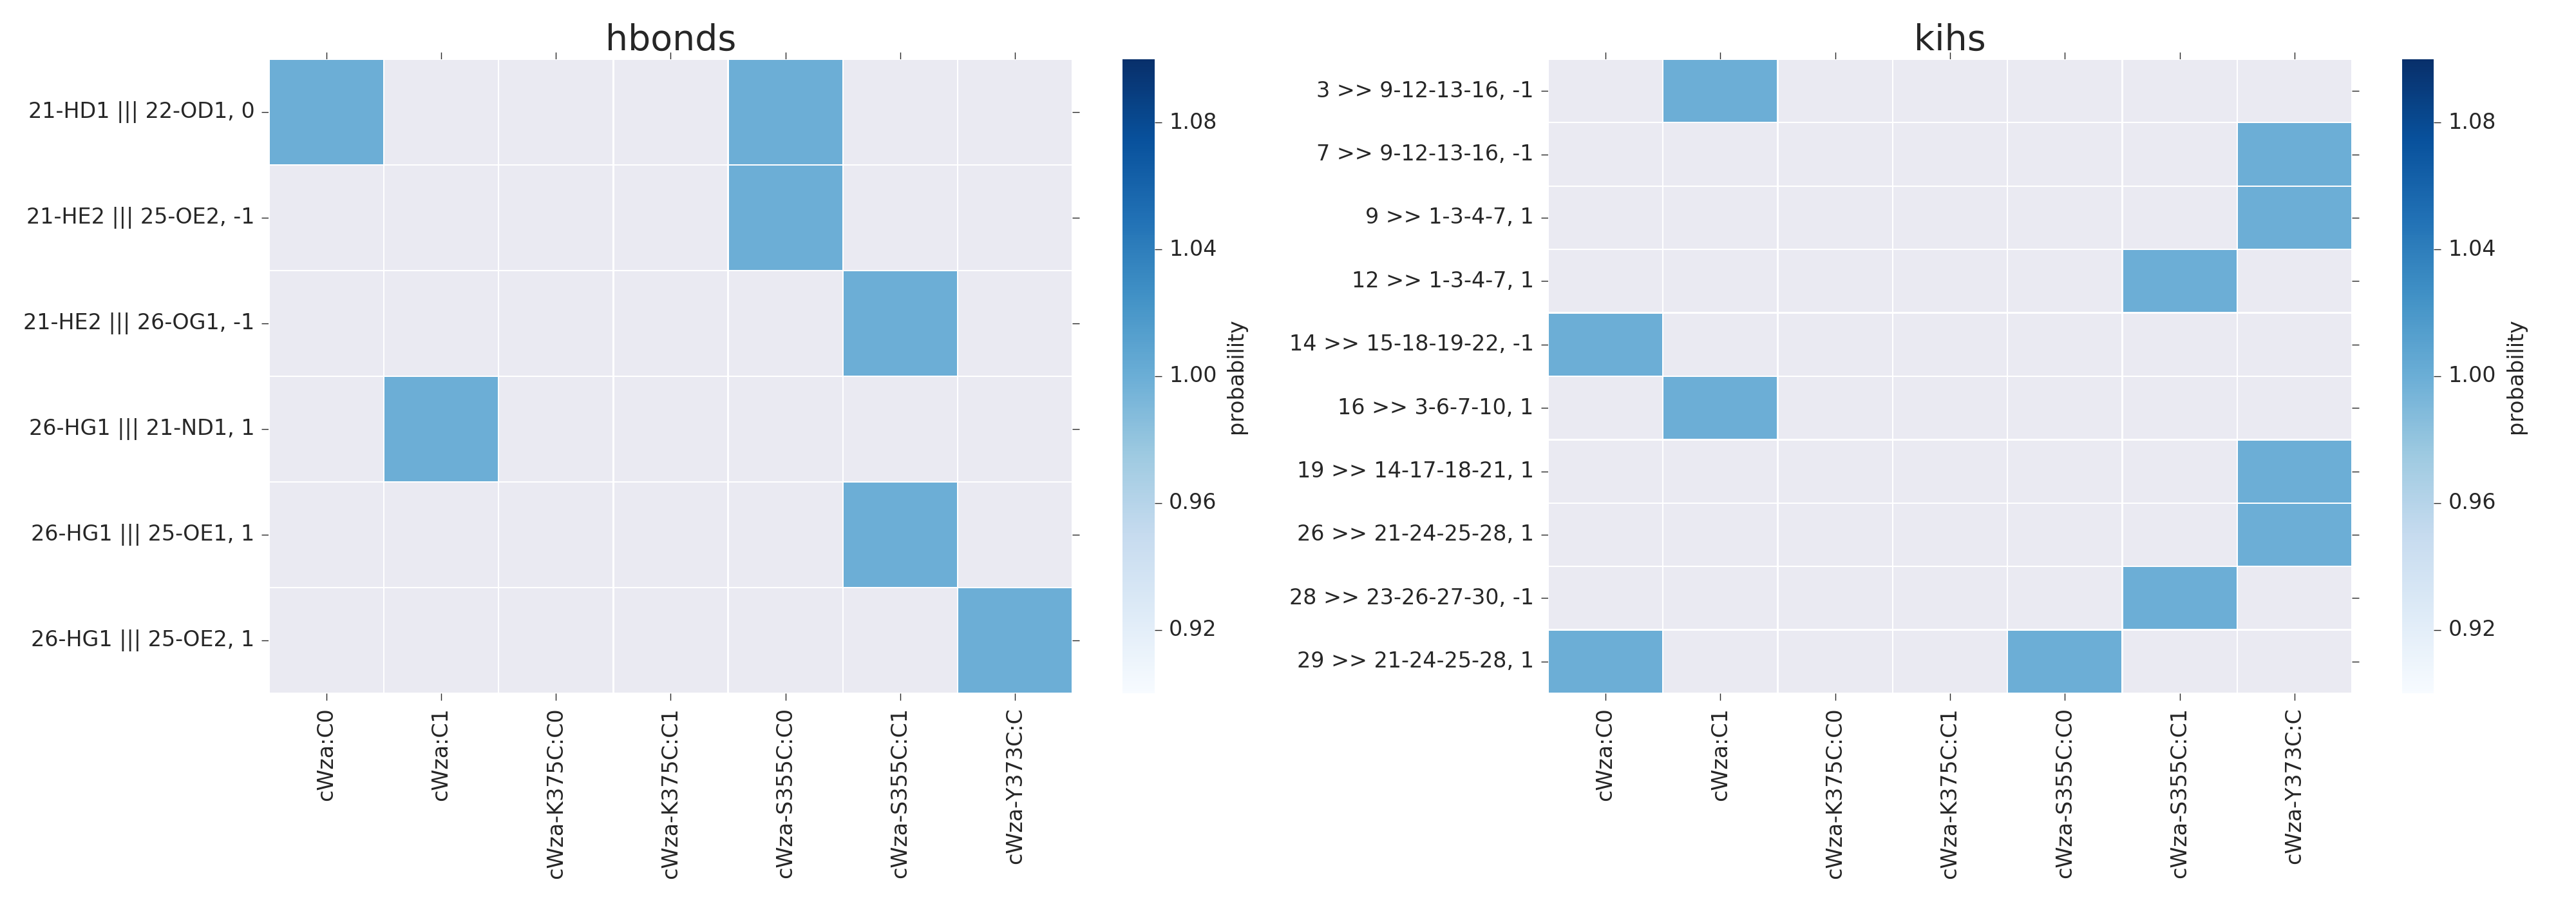

In [7]:
from operator import itemgetter

fig,ax = plt.subplots(1,2,figsize=(20,7),dpi=200,sharex=True)
sns.set_style("darkgrid")

Columns = [
    'cWza:C0',
    'cWza:C1',
    'cWza-K375C:C0',
    'cWza-K375C:C1',
    'cWza-S355C:C0',
    'cWza-S355C:C1',
    'cWza-Y373C:C'
]

workdir = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/md_100ns_dbs/'
C = 0
for inter in ['hbonds','kihs']:
    df_path = workdir + 'assessment_'+inter+'_docked2prmd.json'
    with open(df_path,'r') as fp:
        df = pd.DataFrame(json.load(fp))
    df = df[df == 1]
    df = df[Columns]
    sbase_refined = list(df.index)
    if inter == 'hbonds':
        rank = [(int(sbase_refined[i].split('-')[0]),i) for i in range(len(sbase_refined))]
    elif inter == 'kihs':
        rank = [(int(sbase_refined[i].split('>>')[0]),i) for i in range(len(sbase_refined))]
    sorted_sbase = itemgetter(*[x[1] for x in sorted(rank, key=itemgetter(0))])(sbase_refined)
    df = df.reindex(list(sorted_sbase)[::-1])
    df = df.dropna(how='all')
    
    sns.heatmap(
        df.iloc[::-1], 
        cmap='Blues',
        linewidths = 0.5,
        linecolor='white',
        cbar=True,
        cbar_kws={"label": "probability"},
        ax=ax[C]
    )
    # Customize Heatmaps
    ax[C].set_title(inter,fontsize=20)
    
    C +=1

fig.tight_layout()
plt.show()

# Select models for Visualization

Load Dictionary of Classified Models according to Interaction Partition

In [2]:
import json
import pandas as pd

In [3]:
wd = '/projects/s21/ba13026/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/'
with open(wd+'all_docked-pdbs_conformations_interaction-partitioned.json','r') as fp:
    mydict = json.load(fp)

In [5]:
mydict.keys()

dict_keys(['["cWza-Y373C", "conformation0"]', '["cWza", "conformation1"]', '["cWza-S355C", "conformation0"]', '["cWza-K375C", "conformation1"]', '["cWza-S355C", "conformation1"]', '["cWza", "conformation0"]', '["cWza-K375C", "conformation0"]'])

In [13]:
dict_key = '["cWza-K375C", "conformation1"]'
inter_partition = 'hbonds_AND_kihs'

model_dir = mydict[dict_key][inter_partition]

In [14]:
model_dir

['cWza-K375C/conformation0/refined1_0001_INPUT_0385_ignorechain',
 'cWza-K375C/conformation0/refined1_0001_INPUT_0736_ignorechain',
 'cWza-K375C/conformation0/refined1_0001_INPUT_0002_ignorechain',
 'cWza-K375C/conformation0/refined1_0001_INPUT_0806_ignorechain',
 'cWza-K375C/conformation0/refined1_0001_INPUT_0902_ignorechain',
 'cWza-K375C/conformation0/refined1_0001_INPUT_0298_ignorechain',
 'cWza-K375C/conformation0/refined1_0001_INPUT_0875_ignorechain',
 'cWza-K375C/conformation0/refined1_0001_INPUT_0074_ignorechain',
 'cWza-K375C/conformation0/refined1_0001_INPUT_0050_ignorechain']

Load dataframe of condensed distinguishing/robust interactions

In [15]:
inter = 'hbonds'
df_test = pd.read_json(wd+'figs/df_assessment_'+inter+'_docked-prmd.json')

In [17]:
df_key = 'cWza-K375C:C1'
df_test[df_key]

21-HD1 ||| 22-OD1, 0     0.00000
21-HD1 ||| 26-OG1, -1    0.52381
21-HE2 ||| 26-OG1, -1    0.00000
26-HG1 ||| 21-ND1, 1     0.00000
26-HG1 ||| 25-OE1, 1     0.00000
26-HG1 ||| 25-OE2, 1     0.00000
Name: cWza-K375C:C1, dtype: float64

In [402]:
X = numpy.array(df_test[df_key] > 0)
Y = numpy.array(df_test[df_key].index)
Z = list(Y[X == True])

In [403]:
Z

['21-HD1 ||| 22-OD1, 0']

In [414]:
for index in Z:
    if inter == 'hbonds':
        #####################################
        # Get residue number, atom name, and H-bond direction
        #####################################
        separator = "|||"
        y = index.split(",")[0].split(separator)
        z = y[0].strip().split('-') + y[1].strip().split('-') + \
            [int(index.split(",")[-1])]
        #####################################
        res0 = z[0]; res1 = z[2]
        atom0 = z[1]; atom1 = z[3]
        interaction_direction = z[-1]
        #####################################
        # Define interacting chains
        #####################################
        if interaction_direction == 1:
            chain_combination = "ba"
        elif interaction_direction == -1:
            chain_combination = "ab"
        elif interaction_direction == 0:
            chain_combination = "aa"
        #####################################
        # Orient camera on residues
        #####################################
        tag_orient = "resi "+res0+"+"+res1+" and chain "+\
                        chain_combination[0]+"+"+chain_combination[1]
        #cmd.orient(tag_orient)
        print(tag_orient)
        #####################################
        # Show chains secondary structure
        #####################################
        tag_cartoon = "chain "+chain_combination[0]+"+"+chain_combination[1]
        #cmd.show("cartoon", tag_cartoon)
        print(tag_cartoon)
        #####################################
        # Show sticks for selected residues
        #####################################
        tag_sticks0 = "resi "+res0+" and chain "+chain_combination[0]
        tag_sticks1 = "resi "+res1+" and chain "+chain_combination[1]
        #cmd.show("sticks",tag_sticks0)
        #cmd.show("sticks",tag_sticks1)
        #####################################
        print(tag_sticks0)
        print(tag_sticks1)
        #####################################
        # Setting for viewing
        #####################################
        cmd.bg_color("white")
        cmd.set("orthoscopic")
        cmd.hide("lines")
        cmd.set("ray_orthoscopic")
        cmd.set("transparency_mode",1)
        cmd.set("ray_opaque_background",1)
#         cmd.png(output)
        #####################################
    elif inter == 'kihs':
        separator = ">>"
        y = index.split(",")[0].split(separator)
        z = [str(y[0].strip())] + y[1].strip().split('-') + \
            [int(index.split(",")[-1])]
    print(z)

resi 21+22 and chain a+a
chain a+a
resi 21 and chain a
resi 22 and chain a
['21', 'HD1', '22', 'OD1', 0]


SCRIPT

In [ ]:
import sys
import json
import pandas as pd

wd = '/home/ba13026/research/bg/Wza_Modeling/L-structures/rosetta/bg_test/md_relax/'

pdb = sys.argv[1]
cmd.load(pdb,'model')
#####################################
# Load DataFrame of refined interactions
#####################################
inter = 'hbonds'
df_test = pd.read_json(wd+'figs/df_assessment_'+inter+'_docked-prmd.json')
#####################################
# Extract data for mutant and conformation
#####################################
df_key = 'cWza:C0'
X = numpy.array(df_test[df_key] > 0)
Y = numpy.array(df_test[df_key].index)
Z = list(Y[X == True])
#####################################
# Get screenshots
for index in Z:
    if inter == 'hbonds':
        #####################################
        # Get residue number, atom name, and H-bond direction
        #####################################
        separator = "|||"
        y = index.split(",")[0].split(separator)
        z = y[0].strip().split('-') + y[1].strip().split('-') + \
            [int(index.split(",")[-1])]
        #####################################
        res0 = z[0]; res1 = z[2]
        atom0 = z[1]; atom1 = z[3]
        interaction_direction = z[-1]
        #####################################
        # Define interacting chains
        #####################################
        if interaction_direction == 1:
            chain_combination = "ba"
        elif interaction_direction == -1:
            chain_combination = "ab"
        elif interaction_direction == 0:
            chain_combination = "aa"
        #####################################
        # Orient camera on residues
        #####################################
        tag_orient = "resi "+res0+"+"+res1+" and chain "+\
                        chain_combination[0]+"+"+chain_combination[1]
#         cmd.orient(tag_orient)
        print(tag_orient)
        #####################################
        # Show chains secondary structure
        #####################################
        tag_cartoon = "chain "+chain_combination[0]+"+"+chain_combination[1]
#         cmd.show("cartoon", tag_cartoon)
        print(tag_cartoon)
        #####################################
        # Show sticks for selected residues
        #####################################
        tag_sticks0 = "resi "+res0+" and chain "+chain_combination[0]
        tag_sticks1 = "resi "+res1+" and chain "+chain_combination[1]
#         cmd.show("sticks",tag_sticks0)
#         cmd.show("sticks",tag_sticks1)
        #####################################
        print(tag_sticks0)
        print(tag_sticks1)
        #####################################
        # Setting for viewing
        #####################################
#         cmd.bg_color("white")
#         cmd.set("orthoscopic")
#         cmd.hide("lines")
#         cmd.set("ray_orthoscopic")
#         cmd.set("transparency_mode",1)
#         cmd.set("ray_opaque_background",1)
#         cmd.png("./snapshot_test.png")
        #####################################
    elif inter == 'kihs':
        separator = ">>"
        y = index.split(",")[0].split(separator)
        z = [str(y[0].strip())] + y[1].strip().split('-') + \
            [int(index.split(",")[-1])]
    print(z)